<a href="https://colab.research.google.com/github/kimtaeduck/LSREST/blob/master/putcall_payoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import jax.numpy as jnp

# NumPy 배열 대신 JAX 배열 사용
x = jnp.array([1, 2, 3])
y = jnp.sin(x)

In [ ]:
from jax import grad

def f(x):
    return jnp.sin(x)

df = grad(f)
print(df(2.0))

-0.41614684


In [ ]:
import jax.numpy as jnp
import numpy as np

# NumPy 배열 생성
np_array = np.array([[1, 2, 3], [4, 5, 6]])

# JAX 배열로 변환
jax_array = jnp.array(np_array)

print("JAX array:")
print(jax_array)

JAX array:
[[1 2 3]
 [4 5 6]]


In [ ]:
result = jnp.dot(jax_array, jax_array.T)
print("Matrix multiplication result:")
print(result)

Matrix multiplication result:
[[14 32]
 [32 77]]


In [ ]:
import numpy as np
import jax.numpy as jnp
import jax
import time

# 배열 크기 설정
size = 10000

# NumPy 배열 생성
np_array = np.random.rand(size, size)

# JAX 배열 생성
jax_array = jax.device_put(np_array)

# NumPy를 사용한 행렬 곱셈 함수
def numpy_matmul(arr):
    return np.dot(arr, arr.T)

# JAX를 사용한 행렬 곱셈 함수
@jax.jit
def jax_matmul(arr):
    return jnp.dot(arr, arr.T)

# NumPy 성능 측정
start_time = time.time()
numpy_result = numpy_matmul(np_array)
print(np.min(numpy_result))
numpy_time = time.time() - start_time

# JAX 성능 측정 (컴파일 시간 포함)
start_time = time.time()
jax_result = jax_matmul(jax_array)
print(np.min(jax_result))
jax_time_with_compile = time.time() - start_time

# JAX 성능 측정 (컴파일 시간 제외)
start_time = time.time()
jax_result = jax_matmul(jax_array)
jax_time_without_compile = time.time() - start_time

print(f"NumPy 처리 시간: {numpy_time:.4f} 초")
print(f"JAX 처리 시간 (컴파일 포함): {jax_time_with_compile:.4f} 초")
print(f"JAX 처리 시간 (컴파일 제외): {jax_time_without_compile:.4f} 초")

# 결과 비교
print(f"결과 일치 여부: {np.allclose(numpy_result, jax_result)}")

2386.0823781715258
2385.7634
NumPy 처리 시간: 3.4521 초
JAX 처리 시간 (컴파일 포함): 0.0685 초
JAX 처리 시간 (컴파일 제외): 0.0005 초
결과 일치 여부: False


In [ ]:
import numpy as np
a = np.zeros(10, dtype=float)
a += 9
print(a)

[9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]


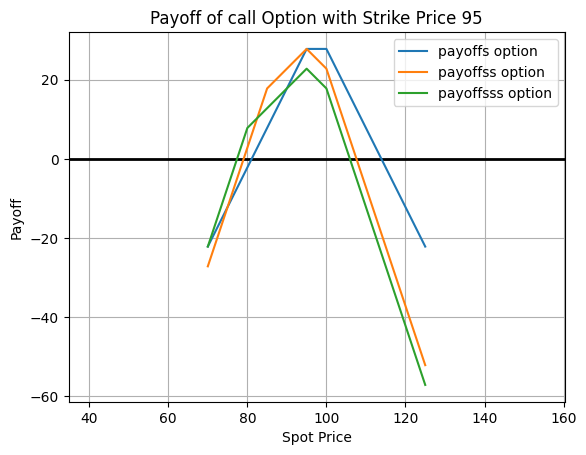

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

payoff  = lambda option, spot_price_range, strike_price, premium : np.maximum((1 if option == 'call' else -1) * (spot_price_range - strike_price), 0) - premium


spot_price_range = np.arange(70, 127.5, 2.5).astype(int)
payoffs = np.zeros(len(spot_price_range), dtype=float)

snl = -1

strike_price0 = 100
premium0 = 10.5
payoffs  = snl * payoff('call', spot_price_range, strike_price0, premium0)

strike_price2 = 100
premium2 = 6.3
payoffs += snl * payoff('put',  spot_price_range, strike_price2, premium2)

# ##################################################

strike_price1 = 95
premium1 = 10
payoffs += snl * payoff('call', spot_price_range, strike_price1, premium1)

strike_price3 = 95
premium3 = 6
payoffs += snl * payoff('put',  spot_price_range, strike_price3, premium3)

# ##################################################

strike_price4 = 85
premium4 = 5
payoffss = payoffs + snl * payoff('call', spot_price_range, strike_price4, premium4)
payoffss += snl * payoff('put',  spot_price_range, strike_price4, premium4)

strike_price5 = 80
premium5 = 5
payoffsss = payoffs + snl * payoff('call', spot_price_range, strike_price5, premium5)
payoffsss += snl * payoff('put',  spot_price_range, strike_price5, premium5)


plt.axis('equal')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title(f'Payoff of {"call"} Option with Strike Price {strike_price1}')
plt.axhline(y=0, color='black', linewidth=2)


plt.plot(spot_price_range, payoffs, label=f'{"payoffs"} option')
plt.plot(spot_price_range, payoffss, label=f'{"payoffss"} option')
plt.plot(spot_price_range, payoffsss, label=f'{"payoffsss"} option')

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
payoffs, len(payoffs)

(array([-22.2, -18.2, -12.2,  -8.2,  -2.2,   1.8,   7.8,  11.8,  17.8,
         21.8,  27.8,  27.8,  27.8,  23.8,  17.8,  13.8,   7.8,   3.8,
         -2.2,  -6.2, -12.2, -16.2, -22.2]),
 23)

In [ ]:
split_1 = int(len(payoffs) / 3)
split_2 = int(2 * len(payoffs) / 3)

left_third = payoffs[:split_1]
right_third = payoffs[split_2:]

print("Left third:", left_third)
print("Right third:", right_third)

Left third: [-22.2 -18.2 -12.2  -8.2  -2.2   1.8   7.8]
Right third: [ 13.8   7.8   3.8  -2.2  -6.2 -12.2 -16.2 -22.2]


In [ ]:
sign_changes = np.where(np.diff(np.sign(payoffs)))[0]

for idx in sign_changes:

  x = np.array([spot_price_range[idx-1], spot_price_range[idx], spot_price_range[idx+1], spot_price_range[idx+2]])
  y = np.array([payoffs[idx-1], payoffs[idx], payoffs[idx+1], payoffs[idx+2]])

  a, b = np.polyfit(x, y, deg=1)

  x_intercept = round(-b / a, 2)

  print(x, y)
  print("절편 :", x_intercept)


[77 80 82 85] [-8.2 -2.2  1.8  7.8]
절편 : 81.1
[110 112 115 117] [ 7.8  3.8 -2.2 -6.2]
절편 : 113.9


In [ ]:
sign_changes = np.where(np.diff(np.sign(payoffss)))[0]

for idx in sign_changes:

  x = np.array([spot_price_range[idx-1], spot_price_range[idx], spot_price_range[idx+1], spot_price_range[idx+2]])
  y = np.array([payoffss[idx-1], payoffss[idx], payoffss[idx+1], payoffss[idx+2]])

  a, b = np.polyfit(x, y, deg=1)

  x_intercept = round(-b / a, 2)

  print(x, y)
  print("절편 :", x_intercept)

[75 77 80 82] [-12.2  -6.2   2.8   8.8]
절편 : 79.07
[102 105 107 110] [16.8  7.8  1.8 -7.2]
절편 : 107.6


In [ ]:
sign_changes = np.where(np.diff(np.sign(payoffsss)))[0]

for idx in sign_changes:

  x = np.array([spot_price_range[idx-1], spot_price_range[idx], spot_price_range[idx+1], spot_price_range[idx+2]])
  y = np.array([payoffsss[idx-1], payoffsss[idx], payoffsss[idx+1], payoffsss[idx+2]])

  a, b = np.polyfit(x, y, deg=1)

  x_intercept = round(-b / a, 2)

  print(x, y)
  print("절편 :", x_intercept)

[75 77 80 82] [-7.2 -1.2  7.8  9.8]
절편 : 77.59
[102 105 107 110] [ 11.8   2.8  -3.2 -12.2]
절편 : 105.93


[77 80 82 85] [-7.4 -1.4  2.6  8.6] 절편: 80.7

[110 112 115 117] [ 8.6  4.6 -1.4 -5.4] 절편: 114.3

2차 함수 방정식: y = -0.2713x^2 + 5.0022x + -4.1242
y=0일 때의 x값:
x = 17.5699
x = 0.8651


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyth

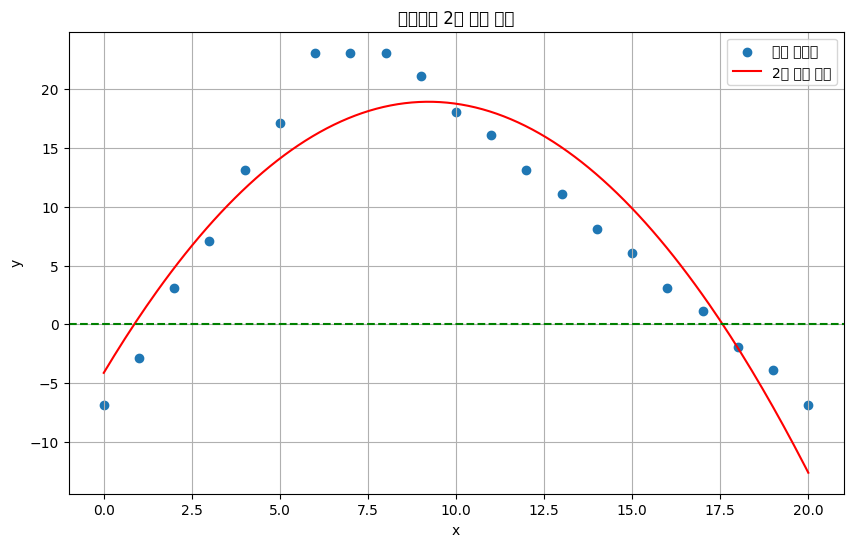

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# 1. 데이터 준비
y = np.array([-6.9, -2.9,  3.1,  7.1, 13.1, 17.1, 23.1, 23.1, 23.1, 21.1, 18.1,
               16.1, 13.1, 11.1,  8.1,  6.1,  3.1,  1.1, -1.9, -3.9, -6.9])
x = np.arange(len(y))

# 2. 2차 함수 모델 정의
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

# 3. 최소제곱법을 사용하여 2차 함수 계수 찾기
popt, _ = optimize.curve_fit(quadratic_model, x, y)
a, b, c = popt

# 4. 결과 출력
print(f"2차 함수 방정식: y = {a:.4f}x^2 + {b:.4f}x + {c:.4f}")

# 5. y=0일 때의 x값 구하기
roots = np.roots([a, b, c])
real_roots = roots[np.isreal(roots)].real

print("y=0일 때의 x값:")
for root in real_roots:
    if 0 <= root <= len(y) - 1:
        print(f"x = {root:.4f}")

# 6. 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='원본 데이터')
x_smooth = np.linspace(0, len(y)-1, 200)
y_smooth = quadratic_model(x_smooth, a, b, c)
plt.plot(x_smooth, y_smooth, 'r-', label='2차 함수 피팅')
plt.axhline(y=0, color='g', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('데이터와 2차 함수 피팅')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Sample data (y-axis values)
y = np.array([-6.9, -2.9, 3.1, 7.1, 13.1, 17.1, 23.1, 23.1, 23.1, 21.1, 18.1, 16.1, 13.1, 11.1, 8.1, 6.1, 3.1, 1.1, -1.9, -3.9, -6.9])

# Check if the length of the array is even (required for fitting a quadratic function)
if len(y) % 2 != 0:
    print("Error: The length of the array must be even to fit a quadratic function.")
    exit()

# Reshape the data into x and y coordinates (assuming equal spacing for x-axis)
x = np.arange(len(y))

# Fit a quadratic function to the data using least squares
coefficients = np.polyfit(x, y, 2)

# Define the quadratic function
def quadratic_function(x):
    return coefficients[0] * x**2 + coefficients[1] * x + coefficients[2]

# Find the x-values where the function is zero (roots of the quadratic equation)
roots = np.roots([coefficients[0], coefficients[1], coefficients[2]])

# Check for real and distinct roots (complex or repeated roots require additional handling)
if np.all(np.isreal(roots)) and len(np.unique(roots)) == 2:
    print("The x-values where the function is zero (roots):", roots)
else:
    print("The function might not have real and distinct roots.")



Error: The length of the array must be even to fit a quadratic function.
The x-values where the function is zero (roots): [17.56986866  0.86505823]


2차 함수 계수: [-4.33157637e-02  8.90813666e+00 -4.39096886e+02]
2차 함수:           2
-0.04332 x + 8.908 x - 439.1
근: [123.71947475  81.93629347]


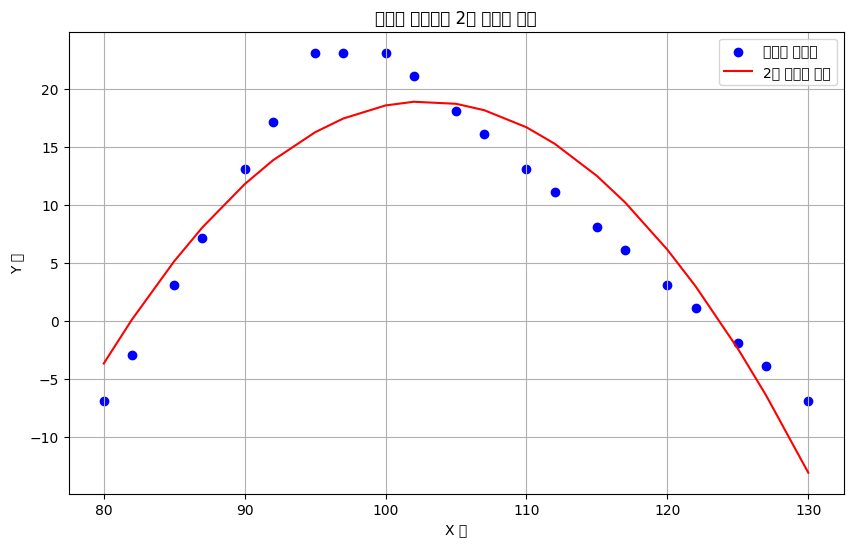

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(80, 131, 2.5).astype(int)
y = np.array([-6.9, -2.9,  3.1,  7.1, 13.1, 17.1, 23.1, 23.1, 23.1, 21.1, 18.1, 16.1, 13.1, 11.1,  8.1,  6.1,  3.1,  1.1, -1.9, -3.9, -6.9])

coefs = np.polyfit(x, y, 2)
poly = np.poly1d(coefs)

print("2차 함수 계수:", coefs)
print("2차 함수:", poly)
print("근:", np.roots(coefs))

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='데이터 포인트')
plt.plot(x, poly(x), color='red', label='2차 다항식 피팅')

plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.title('데이터 포인트와 2차 다항식 피팅')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
import numpy as np

x = np.arange(80, 101, 2.5).astype(int)
y = np.array([-6.9, -2.9,  3.1,  7.1, 13.1, 17.1, 23.1, 23.1, 23.1]) #, 21.1, 18.1, 16.1, 13.1, 11.1,  8.1,  6.1,  3.1,  1.1, -1.9, -3.9, -6.9])

print(len(x), len(y))

coefs = np.polyfit(x, y, 2)
poly = np.poly1d(coefs)

print("2차 함수 계수:", coefs)
print("2차 함수:", poly)
print("근:", np.roots(coefs))

9 9
2차 함수 계수: [-5.34897361e-02  1.12641642e+01 -5.66809677e+02]
2차 함수:           2
-0.05349 x + 11.26 x - 566.8
근: [127.42779453  83.15773179]


In [ ]:
import numpy as np

y = np.array([-6.9, -2.9, 3.1, 7.1, 13.1, 17.1, 23.1, 23.1])
x = np.arange(80, 98, 2.5).astype(int)

a, b = np.polyfit(x, y, deg=1)

x_intercept = -b / a

print("x절편:", x_intercept)


x절편: 83.36141078838179


In [ ]:
import numpy as np

# y = np.array([11.1, 8.1, 6.1, 3.1, 1.1, -1.9, -3.9, -6.9])
y = np.array([-6.9, -2.9, 3.1, 7.1, 13.1, 17.1, 23.1, 23.1])
x = np.arange(111, 131, 2.5).astype(int)

print(len(x), len(y))

a, b = np.polyfit(x, y, deg=1)

x_intercept = -b / a

print("x절편:", x_intercept)


8 8
x절편: 121.56793893129772


array([-6.9, -2.9,  3.1,  7.1, 13.1, 17.1, 23.1, 23.1])

위  배열로부터 음수와 양수가 인접한 위치 인텍스 찾는 numpy만 사용한 파이썬 코드 천천히 상세히 한국어

In [ ]:
import numpy as np

# 주어진 배열
# arr = np.array([-6.9, -2.9, 3.1, 7.1, 13.1, 17.1, 23.1, 23.1])
# arr = np.array([11.1, 8.1, 6.1, 3.1, 1.1, -1.9, -3.9, -6.9])
arr = np.array([-6.9, -2.9,  3.1,  7.1, 13.1, 17.1, 23.1, 23.1, 23.1, 21.1, 18.1, 16.1, 13.1, 11.1,  8.1,  6.1,  3.1,  1.1, -1.9, -3.9, -6.9])

sign_changes = np.where(np.diff(np.signbit(arr)))[0]

print(np.diff(np.signbit(arr)))
print("음수와 양수가 인접한 위치의 인덱스:", sign_changes)

[False  True False False False False False False False False False False
 False False False False False  True False False]
음수와 양수가 인접한 위치의 인덱스: [ 1 17]


In [ ]:
arr = np.array([False, True, False, False, False, False, False, False, False, False, False, False,
                False, False, False, False, False, True, False, False])

# True와 False가 서로 인접한 위치 찾기
adjacent_indices = np.where(arr[:-1] != arr[1:])[0]

print("True와 False가 서로 인접한 위치의 인덱스:", adjacent_indices)

True와 False가 서로 인접한 위치의 인덱스: [ 0  1 16 17]


In [ ]:
import numpy as np

# y = np.array([11.1, 8.1, 6.1, 3.1, 1.1, -1.9, -3.9, -6.9])
y = np.array([-6.9, -2.9, 3.1, 7.1, 13.1, 17.1, 23.1, 23.1])
x = np.arange(80, 98, 2.5).astype(int)

print(len(x), len(y))

a, b = np.polyfit(x, y, deg=1)

x_intercept = -b / a

print("x절편:", x_intercept)

8 8
x절편: 83.36141078838179


In [ ]:
import numpy as np

def find_adjacent_sign_changes(payoffs):
    """
    음수와 양수가 서로 인접한 구간의 시작과 끝 인덱스를 2차원 배열로 반환합니다.

    Args:
        payoffs: 값들의 배열

    Returns:
        2차원 배열: 각 행에 시작 인덱스와 끝 인덱스가 포함되어 있습니다.
    """

    arr = np.diff(np.signbit(payoffs))
    change_indices = np.where(arr[:-1] != arr[1:])[0] + 1  # 시작 인덱스를 맞추기 위해 1을 더함

    # 특별한 경우 처리: 모든 값이 같은 부호인 경우
    if len(change_indices) == 0:
        return np.array([])

    # 시작과 끝 인덱스를 추가하여 2차원 배열 생성
    result = np.column_stack((change_indices, np.append(change_indices[1:], len(payoffs))))

    # 첫 번째 값과 마지막 값이 다른 부호인 경우 첫 번째 행 추가
    if payoffs[0] != payoffs[-1]:
        result = np.vstack(([0, change_indices[0]], result))

    return result

# 예시 실행
payoffs = np.array([-21.4, -17.4, -11.4,  -7.4,  -1.4,   2.6,   8.6,  12.6,  18.6,   22.6,  28.6,  28.6,  28.6,  24.6,  18.6,  14.6,   8.6,   4.6,   -1.4,  -5.4, -11.4, -15.4, -21.4])
result = find_adjacent_sign_changes(payoffs)
print("음수와 양수가 서로 인접한 구간의 시작과 끝 인덱스:")
print(result)


음수와 양수가 서로 인접한 구간의 시작과 끝 인덱스:
[[ 4  5]
 [ 5 17]
 [17 18]
 [18 23]]


[19]
절편 : 19 362.6
[ 7 23]
절편 : 7 333.05
절편 : 23 373.95
[ 3 21]
절편 : 3 324.21
절편 : 21 368.9
[ 7 23]
절편 : 7 333.03
절편 : 23 373.97


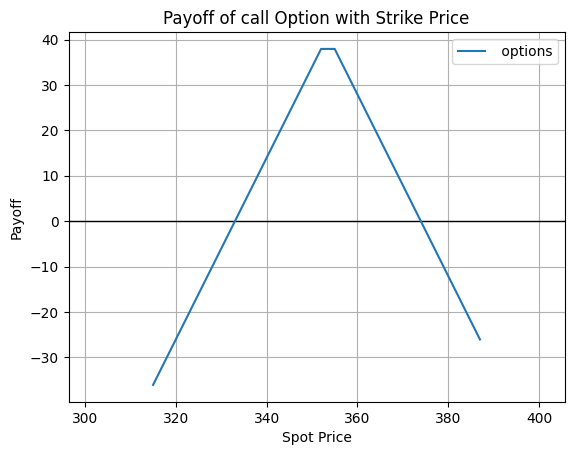

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

payoff  = lambda option, spot_price_range, strike_price, premium : np.maximum((1 if option == 'call' else -1) * (spot_price_range - strike_price), 0) - premium

spot_price_range = np.arange(315, 390, 2.5).astype(int)
payoffs = np.zeros(len(spot_price_range), dtype=float)

snl = -1

options = [ ('call', 352, 10.6),
            ('put',  355, 11.35),

            ('call', 355, 8.84),
            ('put',  352, 10.15)
            ] #,

            # ('call', 80, 5),
            # ('put', 85, 5),

            # ('call', 75, 4),
            # ('put', 80, 4) ]

plt.axis('equal')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title(f'Payoff of {"call"} Option with Strike Price')
plt.axhline(y=0, color='black', linewidth=1)

for option_type, strike_price, premium in options:

    payoffs += snl * payoff(option_type, spot_price_range, strike_price, premium)
    # plt.plot(spot_price_range, payoffs, label=f'{strike_price} option')

    # #################################
    sign_changes = np.where(np.diff(np.sign(payoffs)))[0]
    print(sign_changes)
    for ii, idx in enumerate(sign_changes):

      x = np.array([spot_price_range[idx-1], spot_price_range[idx], spot_price_range[idx+1], spot_price_range[idx+2]])
      y = np.array([payoffs[idx-1], payoffs[idx], payoffs[idx+1], payoffs[idx+2]])

      a, b = np.polyfit(x, y, deg=1)

      x_intercept = round(-b / a, 2)

      #if ii % 2 == 0:
        #plt.plot(spot_price_range, payoffs, label=f'{strike_price} {option_type} option')
        # print(x, y)
      print("절편 :", idx, x_intercept)

    # #################################

plt.plot(spot_price_range, payoffs, label=f' options')

plt.legend()
plt.grid(True)
plt.show()


#
# 여러 행사가별 동일 프리미엄으로 해서 절편 값 변화를 분석하자
# 행사가 갯수를  2->3->4->5 로 변화시키고 증가 폭을 분석하자 !!

절편 : 105.5
절편 : 83.2
절편 : 73.2
절편 : 81.1
절편 : 78.9
절편 : 79.3
절편 : 79.47
절편 : 78.38

[-220.  -207.5 -195.  -182.5 -170.  -157.5 -145.  -132.5 -120.  -107.5
  -95.   -82.5  -70.   -57.5  -45.   -32.5  -20.    -7.5    5.    17.5
   30.    42.5   52.5   57.5   57.5   52.5   42.5   30.    17.5    5.
   -7.5  -20.   -32.5  -45.   -57.5  -70.   -82.5  -95.  -107.5 -120. ]
[18 30] 5.0 -7.5
(array([342.5, 345. , 347.5, 350. ]), array([-7.5,  5. , 17.5, 30. ]))
절편 : 344.0
(array([372.5, 375. , 377.5, 380. ]), array([  5. ,  -7.5, -20. , -32.5]))
절편 : 373.5


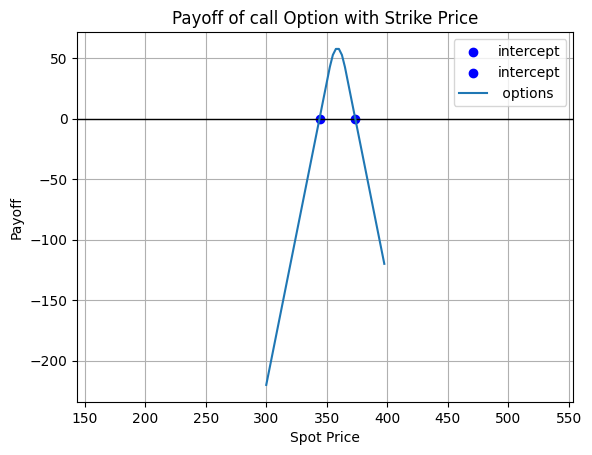

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

payoff  = lambda option, spot_price_range, strike_price, premium : np.maximum((1 if option == 'call' else -1) * (spot_price_range - strike_price), 0) - premium

spot_price_range = np.arange(300, 400, 2.5)
payoffs = np.zeros(len(spot_price_range), dtype=float)

snl = -1

options = [ ('call', 352.5, 10),
            ('put',  355,   10),

            ('call', 355,   9),
            ('put',  357.5, 9),

            ('call', 357.5, 8),
            ('put',  360,   8),

            ('call', 360,   7),
            ('put',  362.5, 7),

            ('call', 362.5, 6),
            ('put',  365,   6),
            ]

            # ('call', 80, 5),
            # ('put', 85, 5),

            # ('call', 75, 4),
            # ('put', 80, 4) ]

# 6 5 4 4 3 3 3 3 2 1 1 0 0
# 0 0 1 1 2 3 3 3 3 4 4 5 6

plt.xlim(300, 400)

plt.axis('equal')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title(f'Payoff of {"call"} Option with Strike Price')
plt.axhline(y=0, color='black', linewidth=1)

for ii, (option_type, strike_price, premium) in enumerate(options):
    payoffs += snl * payoff(option_type, spot_price_range, strike_price, premium)

print(payoffs)

signs = np.sign(payoffs)
signs[signs == 0] = 1
# 연속된 부호가 다른 경우의 index를 찾아 리스트에 저장
sign_changes = np.where(np.diff(signs) != 0)[0] + 1
sign_changes = np.where(signs[:-1] != signs[1:])[0] + 1

# sign_changes = np.where(np.diff(np.sign(payoffs)))[0]
print(sign_changes, payoffs[sign_changes[0]], payoffs[sign_changes[1]])

for ii, idx in enumerate(sign_changes):

  x = np.array([spot_price_range[idx-1], spot_price_range[idx], spot_price_range[idx+1], spot_price_range[idx+2]])
  y = np.array([payoffs[idx-1], payoffs[idx], payoffs[idx+1], payoffs[idx+2]])
  print((x, y))
  a, b = np.polyfit(x, y, deg=1)

  x_intercept = round(-b / a, 2)
  print("절편 :",  x_intercept)
  plt.scatter(x_intercept, 0, color='blue', label='intercept')


plt.plot(spot_price_range, payoffs, label=f' options')
plt.legend()
plt.grid(True)
plt.show()

#
# 여러 행사가별 동일 프리미엄으로 해서 절편 값 변화를 분석하자
# 행사가 갯수를  2->3->4->5 로 변화시키고 증가 폭을 분석하자 !!

[-199.  -186.5 -174.  -161.5 -149.  -136.5 -124.  -111.5  -99.   -86.5
  -74.   -61.5  -49.   -36.5  -24.   -11.5    1.    13.5   26.    38.5   51.    63.    73.    77.    77.    71.    61.    48.5   36.    23.5   11.    -1.5  -14.   -26.5  -39.   -51.5  -64.   -76.5  -89.  -101.5]

[15 30] -11.5 11.0

(array([335. , 337.5, 340. , 342.5]), array([-24. , -11.5,   1. ,  13.5]))
절편 : 339.8

(array([372.5, 375. , 377.5, 380. ]), array([ 23.5,  11. ,  -1.5, -14. ]))
절편 : 377.2

[14 29]
14 -2.5 0
29 2 -0.5


1400
(array([353.75, 354.  , 354.25, 354.5 ]), array([ 12.5,   4. ,  -4.5, -13. ]))
 절편 : [354.12]


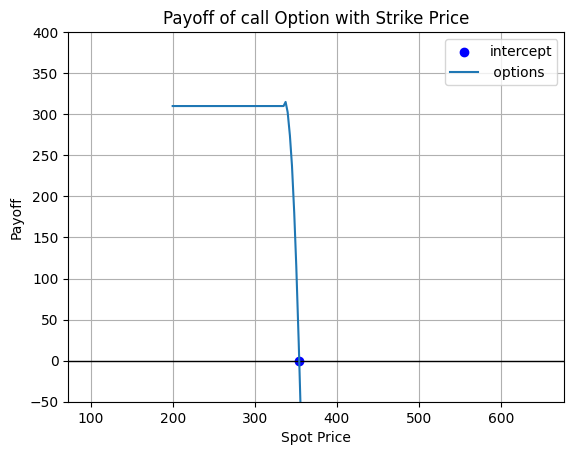

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

payoff = lambda option, spot_price_range, strike_price, premium, count : np.sign(premium) * np.maximum((1 if option == 'call' else -1) * (spot_price_range - strike_price), 0) * count - premium * count

spot_price_range = np.arange(200, 550, 0.25)
payoffs = np.zeros(len(spot_price_range), dtype=float)

options = [
            # ('call', 377.5,  10, 4), ('put',  375,   -10, 6), # 7
            # ('call', 375,    10, 3), ('put',  372.5, -10, 6), # 6
            # ('call', 372.5,  10, 2), ('put',  370,   -10, 5), # 5
            # ('call', 370,    10, 1), ('put',  367.5, -10, 5), # 4
            # ('call', 367.5, -10, 1), ('put',  365,   -10, 4), # 3
            # ('call', 365,   -10, 1), ('put',  362.5, -10, 4), # 2
            # ('call', 362.5, -10, 2), ('put',  360,   -10, 3), # 1

            # ('call', 360,   -10, 3), ('put',  357.5, -10, 3), # 0
            # ('call', 357.5, -10, 3), ('put',  355,   -10, 3), # 0
            # ('call', 355,   -10, 3), ('put',  352.5, -10, 3), # 0

            # ('call', 352.5, -10, 3), ('put',  350,   -10, 2), # 1
            # ('call', 350,   -10, 4), ('put',  347.5, -10, 1), # 2
            # ('call', 347.5, -10, 4), ('put',  345,   -10, 1), # 3
            # ('call', 345,   -10, 5), ('put',  342.5,  10, 1), # 4
            # ('call', 342.5, -10, 5), ('put',  340,    10, 2), # 5
            # ('call', 340,   -10, 6), ('put',  337.5,  10, 3), # 6
            # ('call', 337.5, -10, 9), ('put',  335,    10, 7), # 7

            # ------------------------------------------------------------

            ('call', 360,   -10, 1), ('put',  357.5, -10, 1), # 0
            ('call', 357.5, -10, 1), ('put',  355,   -10, 1), # 0
            ('call', 355,   -10, 1), ('put',  352.5, -10, 1), # 0

            ('call', 352.5, -10, 3), ('put',  350,   -10, 1), # 1
            ('call', 350,   -10, 4), ('put',  347.5, -10, 1), # 2
            ('call', 347.5, -10, 4), ('put',  345,   -10, 1), # 3
            ('call', 345,   -10, 5), ('put',  342.5,  10, 1), # 4
            ('call', 342.5, -10, 5), ('put',  340,    10, 1), # 5
            ('call', 340,   -10, 6), ('put',  337.5,  10, 2), # 6
            ('call', 337.5, -10, 9), ('put',  335,    10, 2), # 7

            ]

# 5 4 3 2 1 0 0 0 1 2 3 4 5
# 6 5 4 4 3 3 3 3 2 1 1 0 0
# 0 0 1 1 2 3 3 3 3 4 4 5 6


plt.axis('equal')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title(f'Payoff of {"call"} Option with Strike Price')
plt.axhline(y=0, color='black', linewidth=1)

for ii, (option_type, strike_price, premium, count) in enumerate(options):
    payoffs += payoff(option_type, spot_price_range, strike_price, premium, count)

print(len(payoffs))

signs = np.sign(payoffs)
signs[signs == 0] = 1
# 연속된 부호가 다른 경우의 index를 찾아 리스트에 저장
sign_changes = np.where(np.diff(signs) != 0)[0] + 1
sign_changes = np.where(signs[:-1] != signs[1:])[0] + 1

sign_changes = np.where(np.diff(np.sign(payoffs)))[0]
# print(sign_changes, payoffs[sign_changes[0]], payoffs[sign_changes[1]])

x_intercept = []

for idx in sign_changes:

  x = np.array([spot_price_range[idx-1], spot_price_range[idx], spot_price_range[idx+1], spot_price_range[idx+2]])
  y = np.array([payoffs[idx-1], payoffs[idx], payoffs[idx+1], payoffs[idx+2]])
  print((x, y))
  a, b = np.polyfit(x, y, deg=1)
  x_intercept.append(round(-b/a, 2))

  plt.scatter( x_intercept, 0, color='blue', label='intercept')


print(" 절편 :",  x_intercept)


plt.plot(spot_price_range, payoffs, label=f' options')
plt.legend()
plt.grid(True)

plt.xlim(200, 550)
plt.ylim(-50, 400)

plt.show()


[29]
(array([370. , 372.5, 375. , 377.5]), array([ 0. , -2.5, -5. , -7.5]))
절편 : 370.0


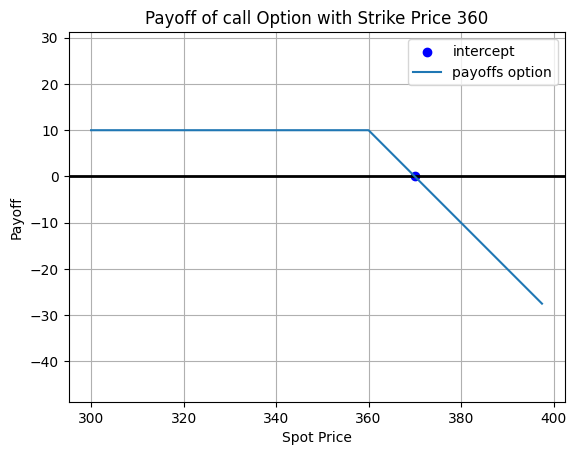

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

payoff  = lambda option, spot_price_range, strike_price, premium, count : np.sign(premium) * np.maximum((1 if option == 'call' else -1) * (spot_price_range - strike_price), 0) * count - premium * count
# payoff  = lambda option, spot_price_range, strike_price, premium, count : premium * count  +  np.maximum((1 if option == 'call' else -1) * (spot_price_range - strike_price), 0) * count

spot_price_range = np.arange(300, 400, 2.5)
payoffs = np.zeros(len(spot_price_range), dtype=float)

strike_price = 360
premium = -10
payoffs  =  payoff('call', spot_price_range, strike_price, premium, 1)

plt.axis('equal')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title(f'Payoff of {"call"} Option with Strike Price {strike_price}')
plt.axhline(y=0, color='black', linewidth=2)

signs = np.sign(payoffs)
signs[signs == 0] = 1
# 연속된 부호가 다른 경우의 index를 찾아 리스트에 저장
sign_changes = np.where(np.diff(signs) != 0)[0] + 1

# print(sign_changes, payoffs[sign_changes[0]], payoffs[sign_changes[1]])
print(sign_changes)

for ii, idx in enumerate(sign_changes):

  x = np.array([spot_price_range[idx-1], spot_price_range[idx], spot_price_range[idx+1], spot_price_range[idx+2]])
  y = np.array([payoffs[idx-1], payoffs[idx], payoffs[idx+1], payoffs[idx+2]])
  print((x, y))
  a, b = np.polyfit(x, y, deg=1)

  x_intercept = round(-b / a, 2)
  print("절편 :",  x_intercept)
  plt.scatter(x_intercept, 0, color='blue', label='intercept')

plt.plot(spot_price_range, payoffs, label=f'{"payoffs"} option')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
bb = np.arange(0, 1000, 2.5)
len(bb)

400

In [ ]:
import numpy as np

arr = np.array([1, 5])
np.diff(arr)  >= 4

array([ True])

1400
[593 771]
(array([348.  , 348.25, 348.5 , 348.75]), array([-2.5,  5. , 12.5, 20. ]))
(array([392.5 , 392.75, 393.  , 393.25]), array([ 2.5 , -0.75, -4.  , -7.25]))
 x_intercept : [348.08, 392.69]
 절편 : [348.08, 392.69] 44.610000000000014


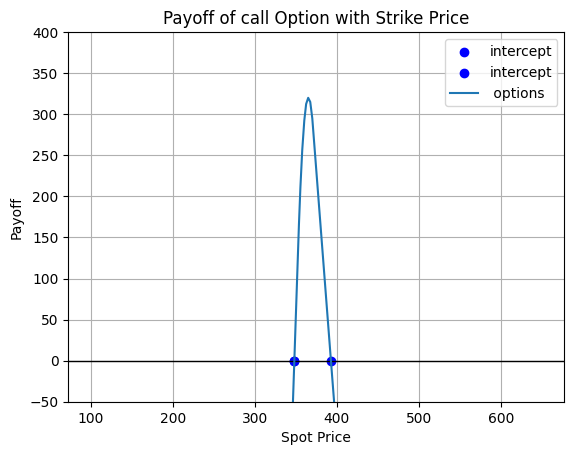

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

payoff = lambda option, spot_price_range, strike_price, premium, count : np.sign(premium) * np.maximum((1 if option == 'call' else -1) * (spot_price_range - strike_price), 0) * count - premium * count

spot_price_range = np.arange(200, 550, 0.25)
payoffs = np.zeros(len(spot_price_range), dtype=float)

options = [
            # ('call', 377.5,  10, 2), ('put',  375,   -10, 6), # 7
            # ('call', 377.5,  10, 4), ('put',  375,   -10, 6), # 7
            # ('call', 375,    10, 3), ('put',  372.5, -10, 6), # 6
            ('call', 372.5,  10, 1), ('put',  370,   -10, 5), # 5
            ('call', 370,    10, 1), ('put',  367.5, -10, 5), # 4
            ('call', 367.5, -10, 0), ('put',  365,   -10, 4), # 3
            ('call', 365,   -10, 1), ('put',  362.5, -10, 4), # 2
            ('call', 362.5, -10, 2), ('put',  360,   -10, 3), # 1

            ('call', 360,   -10, 3), ('put',  357.5, -10, 3), # 0
            ('call', 357.5, -10, 3), ('put',  355,   -10, 3), # 0
            ('call', 355,   -10, 3), ('put',  352.5, -10, 3), # 0

            # ('call', 352.5, -10, 3), ('put',  350,   -10, 2), # 1
            # ('call', 350,   -10, 4), ('put',  347.5, -10, 1), # 2
            # ('call', 347.5, -10, 4), ('put',  345,   -10, 1), # 3
            # ('call', 345,   -10, 5), ('put',  342.5,  10, 1), # 4
            # ('call', 342.5, -10, 5), ('put',  340,    10, 2), # 5
            # ('call', 340,   -10, 6), ('put',  337.5,  10, 3), # 6
            # ('call', 337.5, -10, 9), ('put',  335,    10, 7), # 7

            # ------------------------------------------------------------

            # ('call', 360,   -10, 1), ('put',  357.5, -10, 1), # 0
            # ('call', 357.5, -10, 1), ('put',  355,   -10, 1), # 0
            # ('call', 355,   -10, 1), ('put',  352.5, -10, 1), # 0

            # ('call', 352.5, -10, 3), ('put',  350,   -10, 1), # 1
            # ('call', 350,   -10, 4), ('put',  347.5, -10, 1), # 2
            # ('call', 347.5, -10, 4), ('put',  345,   -10, 1), # 3
            # ('call', 345,   -10, 5), ('put',  342.5,  10, 1), # 4
            # ('call', 342.5, -10, 5), ('put',  340,    10, 1), # 5
            # ('call', 340,   -10, 6), ('put',  337.5,  10, 2), # 6
            # ('call', 337.5, -10, 9), ('put',  335,    10, 2), # 7

            ]

# 5 4 3 2 1 0 0 0 1 2 3 4 5
# 6 5 4 4 3 3 3 3 2 1 1 0 0
# 0 0 1 1 2 3 3 3 3 4 4 5 6


plt.axis('equal')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title(f'Payoff of {"call"} Option with Strike Price')
plt.axhline(y=0, color='black', linewidth=1)

for ii, (option_type, strike_price, premium, count) in enumerate(options):
    payoffs += payoff(option_type, spot_price_range, strike_price, premium, count)

print(len(payoffs))

signs = np.sign(payoffs)
signs[signs == 0] = 1
# 연속된 부호가 다른 경우의 index를 찾아 리스트에 저장
sign_changes = np.where(np.diff(signs) != 0)[0] + 1

# print(sign_changes, payoffs[sign_changes[0]], payoffs[sign_changes[1]])
print(sign_changes)

x_intercept = []

for idx in sign_changes:

  x = np.array([spot_price_range[idx-1], spot_price_range[idx], spot_price_range[idx+1], spot_price_range[idx+2]])
  y = np.array([payoffs[idx-1], payoffs[idx], payoffs[idx+1], payoffs[idx+2]])
  print((x, y))
  a, b = np.polyfit(x, y, deg=1)
  x_intercept.append(round(-b/a, 2))

  plt.scatter( x_intercept, [0,]*len(x_intercept), color='blue', label='intercept')

print(" x_intercept :",  x_intercept)

if len(x_intercept) == 2:
  print(" 절편 :",  x_intercept, np.diff(x_intercept)[0])
else:
  print(" 비정상 절편 :",  x_intercept)

plt.plot(spot_price_range, payoffs, label=f' options')
plt.legend()
plt.grid(True)

plt.xlim(200, 550)
plt.ylim(-50, 400)

plt.show()

# 41  42   43   46  57  100

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

payoff = lambda option, spot_price_range, strike_price, premium, count : np.sign(premium) * np.maximum((1 if option == 'call' else -1) * (spot_price_range - strike_price), 0) * count - premium * count

spot_price_range = np.arange(200, 550, 2.5)
payoffs = np.zeros(len(spot_price_range), dtype=float)


'''
            ('call', 377.5,  10, 3), ('put',  375,   -10, 6), # 7
            ('call', 377.5,  10, 3), ('put',  375,   -10, 6), # 7
            ('call', 375,    10, 2), ('put',  372.5, -10, 6), # 6
            ('call', 372.5,  10, 2), ('put',  370,   -10, 5), # 5
            ('call', 370,    10, 1), ('put',  367.5, -10, 5), # 4
            ('call', 367.5, -10, 0), ('put',  365,   -10, 5), # 3
            ('call', 365,   -10, 1), ('put',  362.5, -10, 4), # 2
            ('call', 362.5, -10, 2), ('put',  360,   -10, 3), # 1
'''
'''
            ('call', 380,    10, 1), ('put',  377.5, -10, 3), # 8
            ('call', 377.5,  10, 1), ('put',  375,   -10, 3), # 7
            ('call', 375,    10, 1), ('put',  372.5, -10, 2), # 6
            ('call', 372.5,  10, 1), ('put',  370,   -10, 2), # 5
            ('call', 370,    10, 0), ('put',  367.5, -10, 2), # 4
            ('call', 367.5, -10, 0), ('put',  365,   -10, 2), # 3
            ('call', 365,   -10, 0), ('put',  362.5, -10, 1), # 2
            ('call', 362.5, -10, 1), ('put',  360,   -10, 1), # 1
'''

options = [
            ('call', 360,   -10, 2), ('put',  357.5, -10, 2), # 0
            ('call', 357.5, -10, 2), ('put',  355,   -10, 2), # 0
            ('call', 355,   -10, 2), ('put',  352.5, -10, 2), # 0

            ('call', 352.5, -10, 2), ('put',  350,   -10, 2), # 1
            ('call', 350,   -10, 2), ('put',  347.5, -10, 1), # 2
            ('call', 347.5, -10, 1), ('put',  345,   -10, 1), # 3
            ('call', 345,   -10, 1), ('put',  342.5, -10, 1), # 4
            ('call', 342.5, -10, 1), ('put',  340,    10, 0), # 5
            ('call', 340,   -10, 2), ('put',  337.5,  10, 2), # 6
            ('call', 337.5, -10, 2), ('put',  335,    10, 3), # 7
            ('call', 335,   -10, 2), ('put',  332.5,  10, 3), # 8
            ('call', 332.5, -10, 2), ('put',  330,    10, 3), # 9
            ('call', 330,   -10, 2), ('put',  327.5,  10, 3), # 0
            ]
            # ------------------------------------------------------------



for ii, (option_type, strike_price, premium, count) in enumerate(options): # [::-1]):

    payoffs += payoff(option_type, spot_price_range, strike_price, premium, count)

    if ii % 2 == 1:
      continue

    signs = np.sign(payoffs)
    signs[signs == 0] = 1

    sign_changes = np.where(np.diff(signs) != 0)[0] + 1

    x_intercept = []

    for idx in sign_changes:

      # x = np.array([spot_price_range[idx-1], spot_price_range[idx], spot_price_range[idx+1], spot_price_range[idx+2]])
      # y = np.array([payoffs[idx-1], payoffs[idx], payoffs[idx+1], payoffs[idx+2]])

      x = spot_price_range[idx-3:idx+3]
      y = payoffs[idx-3:idx+3]

      a, b = np.polyfit(x, y, deg=1)
      x_intercept.append(round(-b/a, 2))

    if len(x_intercept) == 2:
      print( " 절편 :",  x_intercept, round(np.diff(x_intercept)[0],2), ':' , round(x_intercept[1]-x_intercept[0],2))
    else:
      print(" 비정상 절편 :",  x_intercept)



 비정상 절편 : [370.0]
 절편 : [327.5, 373.75] 46.25 : 46.25
 절편 : [331.25, 374.17] 42.92 : 42.92
 절편 : [331.67, 373.75] 42.08 : 42.08
 절편 : [331.25, 373.0] 41.75 : 41.75
 절편 : [330.83, 372.5] 41.67 : 41.67
 절편 : [330.25, 371.88] 41.63 : 41.63
 절편 : [329.55, 371.15] 41.6 : 41.6
 절편 : [327.73, 368.33] 40.6 : 40.6
 절편 : [325.56, 364.67] 39.11 : 39.11
 절편 : [322.5, 360.8] 38.3 : 38.3
 절편 : [315.83, 357.03] 41.2 : 41.2
 비정상 절편 : [352.44]


 비정상 절편 : [370.0]

 절편 : [327.5, 373.75] 46.25

 절편 : [331.25, 374.17] 42.92

 절편 : [331.67, 373.75] 42.08

 절편 : [331.25, 373.0] 41.75

 절편 : [330.83, 372.5] 41.67

 절편 : [330.25, 371.88] 41.63

 절편 : [329.55, 371.15] 41.6

 절편 : [327.73, 368.33] 40.6

 절편 : [325.56, 364.71] 39.15

 절편 : [322.5, 361.05] 38.55

 절편 : [315.83, 357.7] 41.87

 비정상 절편 : [353.53]

In [ ]:
a = [1,2,3,4,5,6]

for ii, aa in enumerate(a):

  if ii % 2 == 1:
    print(ii, aa)

1 2
3 4
5 6


[ 0  1  2  3  4  5  6  7  8  9 10]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

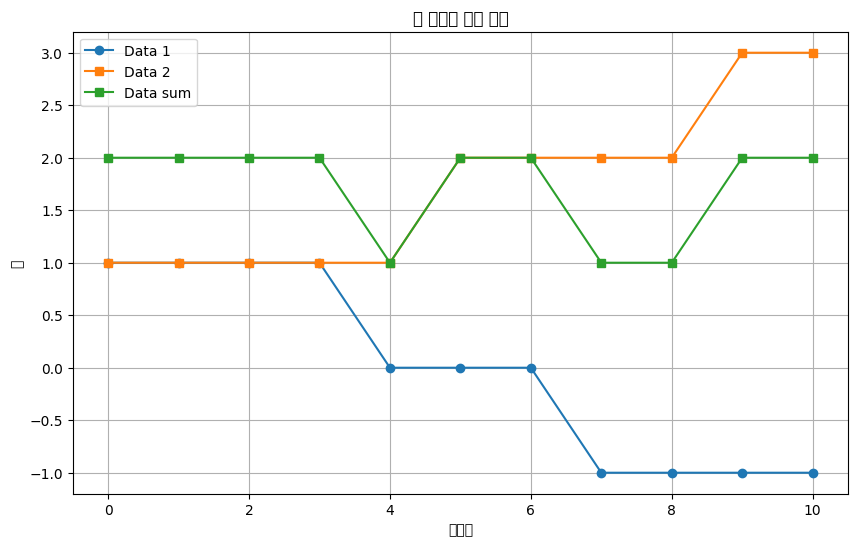

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 정의
data1 = [1,1,1,1,0,0,0,-1,-1,-1,-1]
data2 = [1,1,1,1,1,2,2, 2, 2, 3, 3]
data3 = np.array(data1) + np.array(data2)

x = np.arange(len(data1))
print(x)
plt.figure(figsize=(10, 6))
plt.plot(x, data1, label='Data 1', marker='o')
plt.plot(x, data2, label='Data 2', marker='s')
plt.plot(x, data3, label='Data sum', marker='s')

# 그래프 꾸미기
plt.title('두 데이터 세트 비교')
plt.xlabel('인덱스')
plt.ylabel('값')
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

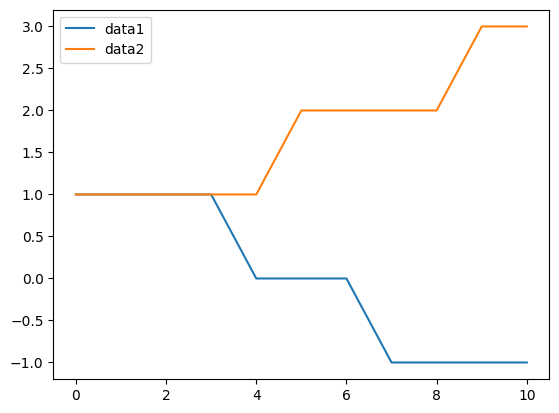

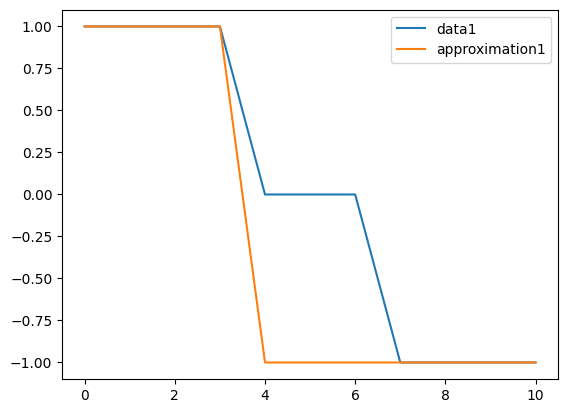

MSE for data1: 0.2727272727272727


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비
data1 = np.array([1,1,1,1,0,0,0,-1,-1,-1,-1])
data2 = np.array([1,1,1,1,1,2,2, 2, 2, 3, 3])

# 데이터 시각화 (선택 사항)
plt.plot(data1, label='data1')
plt.plot(data2, label='data2')
plt.legend()
plt.show()

# 수학적 모델 선택 및 파라미터 추정
# 예시: data1에 대한 단순한 계단 함수 근사
def step_function(x, threshold=4):
    return np.where(x < threshold, 1, -1)

# data1에 대한 근사 함수 적용
approximation1 = step_function(np.arange(len(data1)))

# 예시: data2에 대한 선형 함수 근사
def linear_function(x, a, b):
    return a*x + b

# data2에 대한 근사 함수 적용 (최소 제곱법 등을 이용하여 a, b 값 추정)
# ... (최소 제곱법을 이용한 파라미터 추정 코드는 생략)

# 근사 결과 시각화
plt.plot(data1, label='data1')
plt.plot(approximation1, label='approximation1')
plt.legend()
plt.show()

# 오차 측정 (예: MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

mse1 = mean_squared_error(data1, approximation1)
print("MSE for data1:", mse1)

 비정상 절편 : [367.5]
 비정상 절편 : [376.25]
 절편 : [317.5, 378.33] 60.83


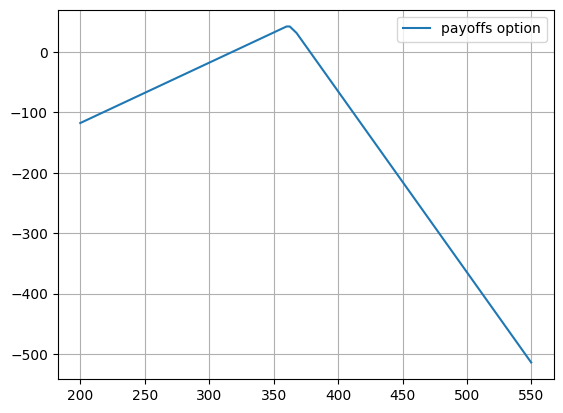

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

payoff = lambda option, spot_price_range, strike_price, premium, count : np.sign(premium) * np.maximum((1 if option == 'call' else -1) * (spot_price_range - strike_price), 0) * count - premium * count

spot_price_range = np.arange(200, 550, 0.25)
payoffs = np.zeros(len(spot_price_range), dtype=float)

options = [
            ('call', 367.5, -10, 1), ('put',  365,   10, 1), # 3
            ('call', 365,   -10, 1), ('put',  362.5, -10, 1), # 2
            ('call', 362.5, -10, 1), ('put',  360,   -10, 1), # 1
            # ('call', 360  , -10, 1), ('put',  360,   -10, 1), # 0
            # ('call', 362.5, -10, 1), ('put',  362.5, -10, 1), # 1
            # ('call', 365,   -10, 1), ('put',  365,   -10, 1), # 1
            ]
            # ------------------------------------------------------------



for ii, (option_type, strike_price, premium, count) in enumerate(options): # [::-1]):

    payoffs += payoff(option_type, spot_price_range, strike_price, premium, count)

    if ii % 2 == 0:
      continue

    signs = np.sign(payoffs)
    signs[signs == 0] = 1

    sign_changes = np.where(np.diff(signs) != 0)[0] + 1

    x_intercept = []

    for idx in sign_changes:

      x = np.array([spot_price_range[idx-1], spot_price_range[idx], spot_price_range[idx+1], spot_price_range[idx+2]])
      y = np.array([payoffs[idx-1], payoffs[idx], payoffs[idx+1], payoffs[idx+2]])

      a, b = np.polyfit(x, y, deg=1)
      x_intercept.append(round(-b/a, 2))

    if len(x_intercept) == 2:
      print( " 절편 :",  x_intercept, round(np.diff(x_intercept)[0],2) )
    else:
      print(" 비정상 절편 :",  x_intercept)

plt.plot(spot_price_range, payoffs, label=f'{"payoffs"} option')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-5-eb56eef7057d>:8: RuntimeWarning: invalid value encountered in power
  y = x**(1/3)


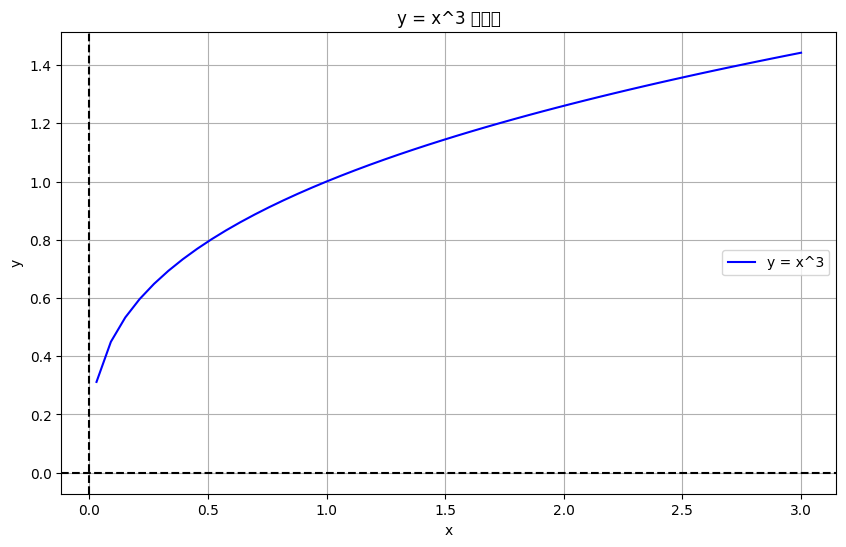

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x 값의 범위 설정
x = np.linspace(-3, 3, 100)

# y = x^3 계산
y = x**(1/3)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='y = x^3')
plt.title('y = x^3 그래프')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

# 그래프 표시
plt.show()

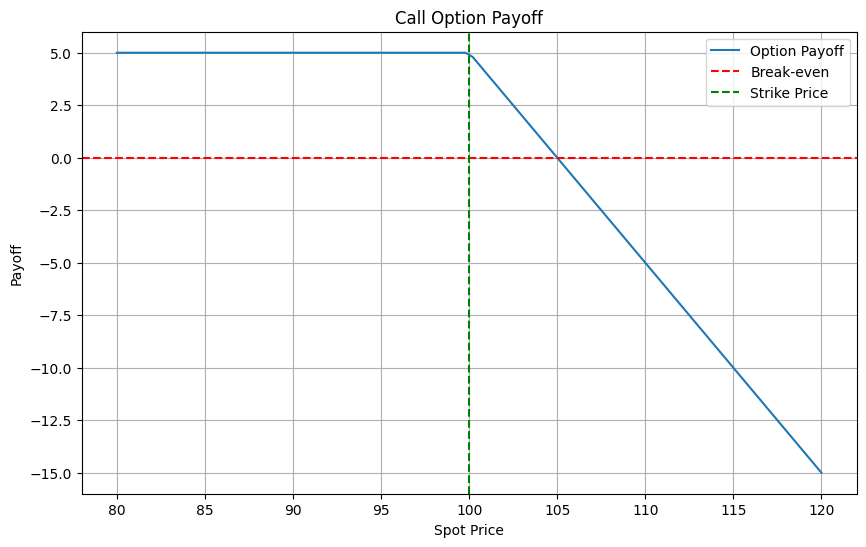

옵션 유형: call
행사가: 100
프리미엄: 5

기초자산 가격별 Payoff:
가격: 80.00, Payoff: 5.00
가격: 84.04, Payoff: 5.00
가격: 88.08, Payoff: 5.00
가격: 92.12, Payoff: 5.00
가격: 96.16, Payoff: 5.00
가격: 100.20, Payoff: 4.80
가격: 104.24, Payoff: 0.76
가격: 108.28, Payoff: -3.28
가격: 112.32, Payoff: -7.32
가격: 116.36, Payoff: -11.36


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def option_payoff(option_type, strike_price, premium, spot_prices, count):
    if option_type.lower() == 'call':
        payoff = (np.maximum(spot_prices - strike_price, 0) - premium) * count
    elif option_type.lower() == 'put':
        payoff = (np.maximum(strike_price - spot_prices, 0) - premium) * count
    else:
        raise ValueError("옵션 유형은 'call' 또는 'put'이어야 합니다.")
    return payoff

# 옵션 파라미터 설정
option_type = 'call'  # 'call' 또는 'put'
strike_price = 100
premium = 5

# 기초자산 가격 범위 설정
spot_prices = np.linspace(80, 120, 100)

# Payoff 계산
payoffs = option_payoff(option_type, strike_price, premium, spot_prices, -1)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(spot_prices, payoffs, label='Option Payoff')
plt.axhline(y=0, color='r', linestyle='--', label='Break-even')
plt.axvline(x=strike_price, color='g', linestyle='--', label='Strike Price')
plt.title(f'{option_type.capitalize()} Option Payoff')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.legend()
plt.grid(True)
plt.show()

# 결과 출력
print(f"옵션 유형: {option_type}")
print(f"행사가: {strike_price}")
print(f"프리미엄: {premium}")
print("\n기초자산 가격별 Payoff:")
for spot, payoff in zip(spot_prices[::10], payoffs[::10]):
    print(f"가격: {spot:.2f}, Payoff: {payoff:.2f}")

In [ ]:
import numpy as np
from scipy import interpolate
from scipy import optimize

# 주어진 데이터
a = [np.array([325., 327.5, 330., 332.5]), np.array([-5., 0., 5., 10.])]
b = [np.array([372.5, 375., 377.5, 380.]), np.array([5., -5., -15., -25.])]

# 1. 각 선에 대한 보간 함수 생성
f_a = interpolate.interp1d(a[0], a[1], fill_value="extrapolate")
f_b = interpolate.interp1d(b[0], b[1], fill_value="extrapolate")

# 2. 두 함수의 차이를 계산하는 함수 정의
def difference(x):
    return f_a(x) - f_b(x)

# 3. 전체 x 범위 결정
x_min = min(a[0][0], b[0][0])
x_max = max(a[0][-1], b[0][-1])

# 4. root_scalar를 사용하여 교차점 찾기
result = optimize.root_scalar(difference, bracket=[x_min, x_max], method='brentq')

if result.converged:
    x_intersection = result.root
    y_intersection = f_a(x_intersection)  # or f_b(x_intersection), they should be the same
    print(f"두 선이 만나는 지점: ({x_intersection:.2f}, {y_intersection:.2f})")
else:
    print("두 선이 만나는 지점을 찾을 수 없습니다.")

두 선이 만나는 지점: (358.33, 61.67)


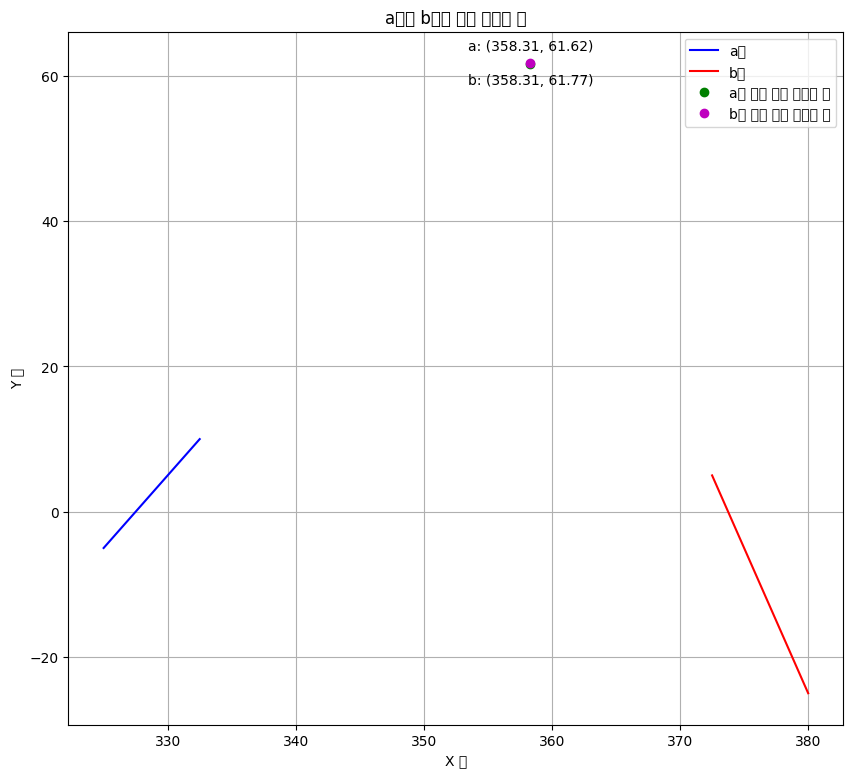

a선 상의 가장 가까운 점 좌표: (358.31, 61.62)
b선 상의 가장 가까운 점 좌표: (358.31, 61.77)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# 데이터 정의
a = [np.array([325., 327.5, 330., 332.5]), np.array([-5., 0., 5., 10.])]
b = [np.array([372.5, 375., 377.5, 380.]), np.array([5., -5., -15., -25.])]

# 1. 두 선의 교차점 찾기 (또는 가장 가까운 점)
def find_intersection_or_closest_points(x1, y1, x2, y2):
    # 각 선에 대한 보간 함수 생성
    f1 = interpolate.interp1d(x1, y1, fill_value="extrapolate")
    f2 = interpolate.interp1d(x2, y2, fill_value="extrapolate")

    # 두 선의 전체 x 범위 결정
    x_min = min(x1.min(), x2.min())
    x_max = max(x1.max(), x2.max())

    # x 범위 내에서 y 값의 차이가 가장 작은 지점 찾기
    x = np.linspace(x_min, x_max, 1000)
    y1_interp = f1(x)
    y2_interp = f2(x)
    idx = np.argmin(np.abs(y1_interp - y2_interp))

    return x[idx], y1_interp[idx], y2_interp[idx]

# 가장 가까운 점 계산
closest_x, closest_y1, closest_y2 = find_intersection_or_closest_points(a[0], a[1], b[0], b[1])

# 2. 그래프 그리기
plt.figure(figsize=(10, 9))

# a선 그리기
plt.plot(a[0], a[1], 'b-', label='a선')

# b선 그리기
plt.plot(b[0], b[1], 'r-', label='b선')

# 가장 가까운 점 표시
plt.plot(closest_x, closest_y1, 'go', label='a선 상의 가장 가까운 점')
plt.plot(closest_x, closest_y2, 'mo', label='b선 상의 가장 가까운 점')

# 그래프 꾸미기
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.title('a선과 b선의 가장 가까운 점')
plt.legend()
plt.grid(True)

# 가장 가까운 점 좌표 텍스트로 표시
plt.annotate(f'a: ({closest_x:.2f}, {closest_y1:.2f})',
             (closest_x, closest_y1),
             textcoords="offset points",
             xytext=(0,10),
             ha='center')
plt.annotate(f'b: ({closest_x:.2f}, {closest_y2:.2f})',
             (closest_x, closest_y2),
             textcoords="offset points",
             xytext=(0,-15),
             ha='center')

# 그래프 표시
plt.show()

# 3. 결과 출력
print(f"a선 상의 가장 가까운 점 좌표: ({closest_x:.2f}, {closest_y1:.2f})")
print(f"b선 상의 가장 가까운 점 좌표: ({closest_x:.2f}, {closest_y2:.2f})")

intersect point :  358.3083083083083 61.616616616616625


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


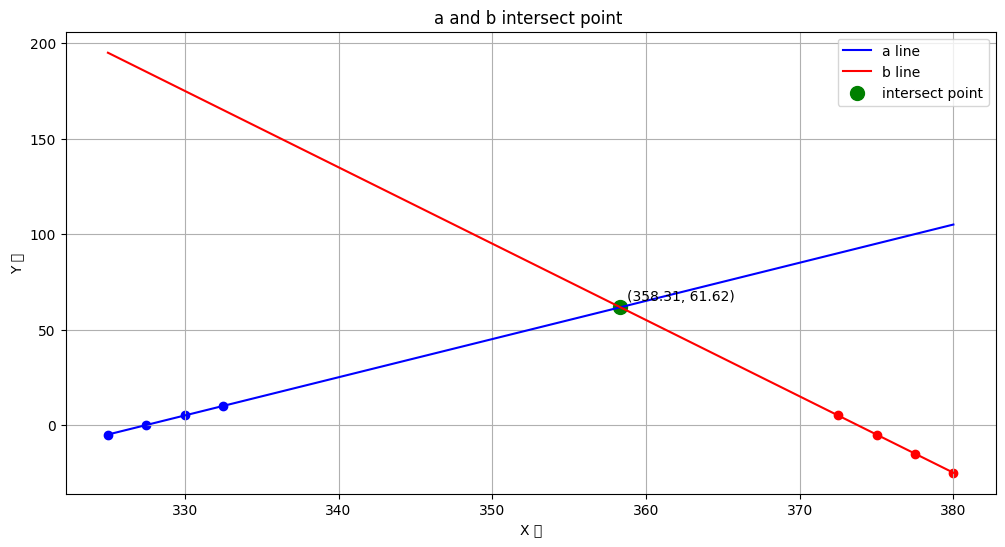

교차점: (358.31, 61.62)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# 1. 데이터 정의
a = [np.array([325., 327.5, 330., 332.5]), np.array([-5., 0., 5., 10.])]
b = [np.array([372.5, 375., 377.5, 380.]), np.array([5., -5., -15., -25.])]

# 2. 전체 x 범위 생성
x_all = np.linspace(min(a[0][0], b[0][0]), max(a[0][-1], b[0][-1]), 1000)

# 3. 각 선에 대한 보간 함수 생성
f_a = interpolate.interp1d(a[0], a[1], bounds_error=False, fill_value="extrapolate")
f_b = interpolate.interp1d(b[0], b[1], bounds_error=False, fill_value="extrapolate")
print(f_a)
# 4. 교차점 찾기
y_a = f_a(x_all)
y_b = f_b(x_all)
idx = np.argwhere(np.diff(np.sign(y_a - y_b))).flatten()

# 교차점이 있는 경우
if len(idx) > 0:
    x_intersect = x_all[idx][0]
    y_intersect = f_a(x_intersect)

    # 5. 그래프 그리기
    plt.figure(figsize=(12, 6))

    # a선 그리기
    plt.plot(x_all, f_a(x_all), 'b-', label='a line')
    plt.scatter(a[0], a[1], color='blue')

    # b선 그리기
    plt.plot(x_all, f_b(x_all), 'r-', label='b line')
    plt.scatter(b[0], b[1], color='red')

    # 교차점 표시
    plt.scatter(x_intersect, y_intersect, color='green', s=100, label='intersect point')
    print('intersect point : ', x_intersect, y_intersect)
    # 그래프 꾸미기
    plt.xlabel('X 축')
    plt.ylabel('Y 축')
    plt.title('a and b intersect point ')
    plt.legend()
    plt.grid(True)

    # 교차점 좌표 표시
    plt.annotate(f'({x_intersect:.2f}, {y_intersect:.2f})',
                 (x_intersect, y_intersect),
                 xytext=(5, 5),
                 textcoords='offset points')

    plt.show()

    # 6. 결과 출력
    print(f"교차점: ({x_intersect:.2f}, {y_intersect:.2f})")
else:
    print("두 선의 교차점을 찾을 수 없습니다.")

1.999999999999982 -654.9999999999942
-4.000000000000052 1495.0000000000202


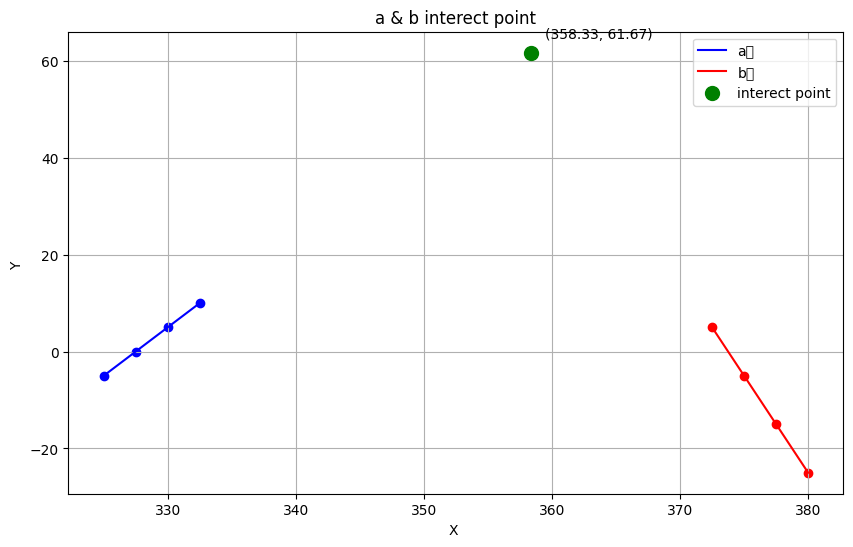

교차점: x = 358.33, y = 61.67


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = [np.array([325., 327.5, 330., 332.5]), np.array([-5., 0., 5., 10.])]
b = [np.array([372.5, 375., 377.5, 380.]), np.array([5., -5., -15., -25.])]

def find_intersection(x1, y1, x2, y2):

    A = np.vstack([x1, np.ones(len(x1))]).T
    B = np.vstack([x2, np.ones(len(x2))]).T

    a1, a0 = np.linalg.lstsq(A, y1, rcond=None)[0]
    b1, b0 = np.linalg.lstsq(B, y2, rcond=None)[0]
    print(a1, a0)
    print(b1, b0)
    x = (b0 - a0) / (a1 - b1)
    y = a1 * x + a0

    return x, y

x_intersect, y_intersect = find_intersection(a[0], a[1], b[0], b[1])

plt.figure(figsize=(10, 6))

plt.plot(a[0], a[1], 'b-', label='a선')
plt.scatter(a[0], a[1], color='blue')

plt.plot(b[0], b[1], 'r-', label='b선')
plt.scatter(b[0], b[1], color='red')

plt.scatter(x_intersect, y_intersect, color='green', s=100, zorder=5, label='interect point')

plt.annotate(f'({x_intersect:.2f}, {y_intersect:.2f})',
             (x_intersect, y_intersect),
             xytext=(10, 10),
             textcoords='offset points')

plt.xlabel('X ')
plt.ylabel('Y ')
plt.title('a & b interect point')
plt.legend()
plt.grid(True)
plt.show()

print(f"교차점: x = {x_intersect:.2f}, y = {y_intersect:.2f}")

1400
[628 936]
(array([356.75, 357.  , 357.25, 357.5 ]), array([-3. ,  0.5,  4. ,  7.5]))
(array([433.75, 434.  , 434.25, 434.5 ]), array([ 0. , -0.5, -1. , -1.5]))
 x_intercept : [356.96, 433.75]
 절편 : [356.96, 433.75] 76.79000000000002


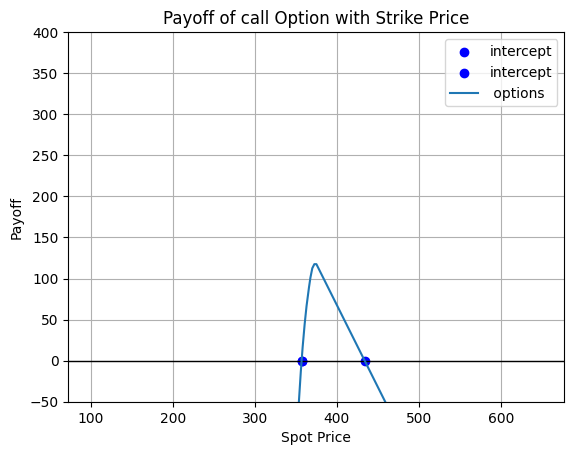

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

payoff = lambda option, spot_price_range, strike_price, premium, count : np.sign(premium) * np.maximum((1 if option == 'call' else -1) * (spot_price_range - strike_price), 0) * count - premium * count

spot_price_range = np.arange(200, 550, 0.25)
payoffs = np.zeros(len(spot_price_range), dtype=float)

options = [
            # ('call', 377.5,  10, 2), ('put',  375,   -10, 6), # 7
            ('call', 377.5,  10, 0), ('put',  375,   -10, 3), # 7
            ('call', 375,    10, 1), ('put',  372.5, -10, 3), # 6
            ('call', 372.5,  10, 1), ('put',  370,   -10, 3), # 5
            ('call', 370,    10, 0), ('put',  367.5, -10, 2), # 4
            ('call', 367.5, -10, 0), ('put',  365,   -10, 1), # 3
            ('call', 365,   -10, 0), ('put',  362.5, -10, 1), # 2
            ('call', 362.5, -10, 1), ('put',  360,   -10, 1), # 1

            ('call', 360,   -10, 1), ('put',  357.5, -10, 1), # 0
            ('call', 357.5, -10, 1), ('put',  355,   -10, 1), # 0
            ('call', 355,   -10, 1), ('put',  352.5, -10, 0), # 0

            # ('call', 352.5, -10, 3), ('put',  350,   -10, 2), # 1
            # ('call', 350,   -10, 4), ('put',  347.5, -10, 1), # 2
            # ('call', 347.5, -10, 4), ('put',  345,   -10, 1), # 3
            # ('call', 345,   -10, 5), ('put',  342.5,  10, 1), # 4
            # ('call', 342.5, -10, 5), ('put',  340,    10, 2), # 5
            # ('call', 340,   -10, 6), ('put',  337.5,  10, 3), # 6
            # ('call', 337.5, -10, 9), ('put',  335,    10, 7), # 7

            # ------------------------------------------------------------

            # ('call', 360,   -10, 1), ('put',  357.5, -10, 1), # 0
            # ('call', 357.5, -10, 1), ('put',  355,   -10, 1), # 0
            # ('call', 355,   -10, 1), ('put',  352.5, -10, 1), # 0

            # ('call', 352.5, -10, 3), ('put',  350,   -10, 1), # 1
            # ('call', 350,   -10, 4), ('put',  347.5, -10, 1), # 2
            # ('call', 347.5, -10, 4), ('put',  345,   -10, 1), # 3
            # ('call', 345,   -10, 5), ('put',  342.5,  10, 1), # 4
            # ('call', 342.5, -10, 5), ('put',  340,    10, 1), # 5
            # ('call', 340,   -10, 6), ('put',  337.5,  10, 2), # 6
            # ('call', 337.5, -10, 9), ('put',  335,    10, 2), # 7

            ]

# 5 4 3 2 1 0 0 0 1 2 3 4 5
# 6 5 4 4 3 3 3 3 2 1 1 0 0
# 0 0 1 1 2 3 3 3 3 4 4 5 6


plt.axis('equal')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title(f'Payoff of {"call"} Option with Strike Price')
plt.axhline(y=0, color='black', linewidth=1)

for ii, (option_type, strike_price, premium, count) in enumerate(options):
    payoffs += payoff(option_type, spot_price_range, strike_price, premium, count)

print(len(payoffs))

signs = np.sign(payoffs)
signs[signs == 0] = 1
# 연속된 부호가 다른 경우의 index를 찾아 리스트에 저장
sign_changes = np.where(np.diff(signs) != 0)[0] + 1

# print(sign_changes, payoffs[sign_changes[0]], payoffs[sign_changes[1]])
print(sign_changes)

x_intercept = []

for idx in sign_changes:

  x = np.array([spot_price_range[idx-1], spot_price_range[idx], spot_price_range[idx+1], spot_price_range[idx+2]])
  y = np.array([payoffs[idx-1], payoffs[idx], payoffs[idx+1], payoffs[idx+2]])
  print((x, y))
  a, b = np.polyfit(x, y, deg=1)
  x_intercept.append(round(-b/a, 2))

  plt.scatter( x_intercept, [0,]*len(x_intercept), color='blue', label='intercept')

print(" x_intercept :",  x_intercept)

if len(x_intercept) == 2:
  print(" 절편 :",  x_intercept, np.diff(x_intercept)[0])
else:
  print(" 비정상 절편 :",  x_intercept)

plt.plot(spot_price_range, payoffs, label=f' options')
plt.legend()
plt.grid(True)

plt.xlim(200, 550)
plt.ylim(-50, 400)

plt.show()



In [ ]:
import numpy as np

ls = [0, 1, -1]
count = [1, 2]

# 모든 가능한 조합 생성 (meshgrid)
i, j, k, f = np.meshgrid(ls, ls, count, count)

print(i.shape, j.shape, k.shape, f.shape)

# 2차원 배열로 변환하여 unique 함수 사용
data = np.stack([i.ravel(), j.ravel(), k.ravel(), f.ravel()], axis=1)
unique_data = np.unique(data, axis=0)

# 결과 출력
for row in unique_data:
    print('put', row[0]*row[2], 'call', row[1]*row[3])

(3, 3, 2, 2) (3, 3, 2, 2) (3, 3, 2, 2) (3, 3, 2, 2)
put -1 call -1
put -1 call -2
put -2 call -1
put -2 call -2
put -1 call 0
put -1 call 0
put -2 call 0
put -2 call 0
put -1 call 1
put -1 call 2
put -2 call 1
put -2 call 2
put 0 call -1
put 0 call -2
put 0 call -1
put 0 call -2
put 0 call 0
put 0 call 0
put 0 call 0
put 0 call 0
put 0 call 1
put 0 call 2
put 0 call 1
put 0 call 2
put 1 call -1
put 1 call -2
put 2 call -1
put 2 call -2
put 1 call 0
put 1 call 0
put 2 call 0
put 2 call 0
put 1 call 1
put 1 call 2
put 2 call 1
put 2 call 2


 비정상 절편 : [352.0]
 비정상 절편 : [351.0]
 절편 :  ['346.50', '397.50'] 51.00  346.50  357.50  11.0
 절편 :  ['343.63', '386.25'] 42.62  343.63  355.00  11.37
 절편 :  ['341.40', '381.67'] 40.27  341.40  352.50  11.1
 절편 :  ['339.40', '376.25'] 36.85  339.40  350.00  10.6
 절편 :  ['337.40', '372.50'] 35.10  337.40  347.50  10.1
 절편 :  ['335.40', '369.58'] 34.18  335.40  345.00  9.6
 절편 :  ['333.40', '367.11'] 33.71  333.40  342.50  9.1
 절편 :  ['331.75', '363.55'] 31.80  331.75  340.00  8.25
 절편 :  ['326.50', '358.46'] 31.96  326.50  337.50  11.0
 절편 :  ['317.25', '353.63'] 36.38  317.25  335.00  17.75
 절편 :  ['282.00', '347.81'] 65.81  282.00  332.50  50.5
 비정상 절편 : [343.59]


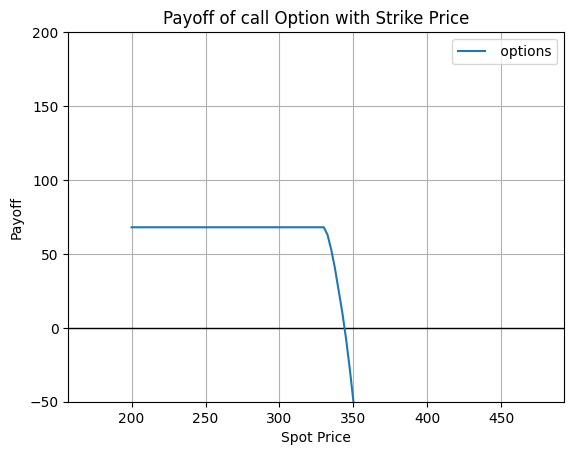

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


payoff = lambda option, spot_price_range, strike_price, premium, count : np.sign(premium) * np.maximum((1 if option == 'call' else -1) * (spot_price_range - strike_price), 0) * count - premium * count

spot_price_range = np.arange(200, 550, 2.5)
payoffs = np.zeros(len(spot_price_range), dtype=float)


options = [
            ('call', 360,   -10, 0), ('put',  362,   -10, 1), # 0
            ('call', 362,   -10, 0), ('put',  360,   -10, 1), # 0
            ('call', 357.5, -10, 1), ('put',  357.5, -10, 1), # 0
            ('call', 355,   -10, 1), ('put',  355,   -10, 1), # 0
            ('call', 352.5, -10, 1), ('put',  352.5, -10, 1), # 1

            ('call', 350,   -10, 1), ('put',  350,    10, 0), # 2
            ('call', 347.5, -10, 1), ('put',  347.5,  10, 0), # 3
            ('call', 345,   -10, 1), ('put',  345,    10, 0), # 4
            ('call', 342.5, -10, 1), ('put',  342.5,  10, 0), # 5

            ('call', 340,   -10, 1), ('put',  340,    10, 1), # 6
            ('call', 337.5, -10, 2), ('put',  337.5,  10, 1), # 7
            ('call', 335,   -10, 2), ('put',  335,    10, 1), # 8
            ('call', 332.5, -10, 3), ('put',  332.5,  10, 1), # 9

            ('call', 330,   -10, 3), ('put',  330,    10, 1), # 0
            # ('call', 327.5, -10, 3), ('put',  327.5,  10, 0), # 0

            # ('call', 360,   -10, 1), ('put',  360,   -10, 1), # 0
            # ('call', 357.5, -10, 1), ('put',  357.5, -10, 1), # 0
            # ('call', 355,   -10, 1), ('put',  355,   -10, 1), # 0

            # ('call', 352.5, -10, 1), ('put',  352.5, -10, 1), # 1
            # ('call', 350,   -10, 1), ('put',  350,   -10, 1), # 2
            # ('call', 347.5, -10, 1), ('put',  347.5, -10, 1), # 3
            # ('call', 345,   -10, 1), ('put',  345,   -10, 1), # 4
            # ('call', 342.5, -10, 1), ('put',  342.5, -10, 1), # 5
            # ('call', 340,   -10, 1), ('put',  340,   -10, 1), # 6
            # ('call', 337.5, -10, 1), ('put',  337.5, -10, 1), # 7
            # ('call', 335,   -10, 2), ('put',  335,   -10, 1), # 8
            # ('call', 332.5, -10, 3), ('put',  332.5, -10, 1), # 8

            ]

# options.pop(0)
# options.pop()

for ii, (option_type, strike_price, premium, count) in enumerate(options): # [::-1]):

    payoffs += payoff(option_type, spot_price_range, strike_price, premium, count)

    if (ii+1) % 2 == 1:
      continue

    signs = np.sign(payoffs)
    signs[signs == 0] = 1

    sign_changes = np.where(np.diff(signs) != 0)[0] + 1

    x_intercept = []

    for idx in sign_changes:

      x = spot_price_range[idx-3:idx+3]
      y = payoffs[idx-3:idx+3]

      a, b = np.polyfit(x, y, deg=1)
      x_intercept.append(round(-b/a, 2))

    if len(x_intercept) == 2:
      formatted_inter = [f"{num:.2f}" for num in x_intercept]
      print( f" 절편 :  {formatted_inter} {round(np.diff(x_intercept)[0],2):.2f}  {x_intercept[0]:.2f}  {strike_price:.2f}  {round(strike_price-x_intercept[0],2)}")
    else:
      print(" 비정상 절편 :",  x_intercept)


plt.axis('equal')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.title(f'Payoff of {"call"} Option with Strike Price')
plt.axhline(y=0, color='black', linewidth=1)

plt.plot(spot_price_range, payoffs, label=f' options')
plt.legend()
plt.grid(True)

plt.xlim(200, 450)
plt.ylim(-50, 200)

plt.show()


 절편 :  ['340.00', '377.50'] 37.50  340.00  357.50  17.5

 절편 :  ['338.75', '376.25'] 37.50  338.75  355.00  16.25

 절편 :  ['337.50', '375.00'] 37.50  337.50  352.50  15.0

 절편 :  ['336.25', '373.75'] 37.50  336.25  350.00  13.75

 절편 :  ['333.75', '370.50'] 36.75  333.75  347.50  13.75

 절편 :  ['331.25', '367.92'] 36.67  331.25  345.00  13.75

 절편 :  ['328.75', '365.71'] 36.96  328.75  342.50  13.75

 절편 :  ['326.25', '363.70'] 37.45  326.25  340.00  13.75

 절편 :  ['321.67', '360.55'] 38.88  321.67  337.50  15.83

 절편 :  ['313.75', '357.45'] 43.70  313.75  335.00  21.25

 절편 :  ['292.50', '354.18'] 61.68  292.50  332.50  40.0

In [ ]:
Echelon = {'front': '111111111234', 'rear': '111100001111'}

print(Echelon['front'][3], Echelon['rear'][3])

1 1



c = '111111111234'

p = '111100001111'

if is centre 존재
기초자산 > center
기초자산 < center

1 layer : 0 <= 포지션 길이 < 5
           11 이 4개

2 layer : 5 <= 포지션 길이 < 9
          상승시 01 이 4개, 하락시 10 이 4개

2.5 layer :  9 <= 포지션 길이   
            centre < 기초자산가 ,  centre > 기초자산가

3 layer : 9 <= 포지션 길이 < ~~
          상승시 -c1111, p1234 , 하락시 c1234, -p1111

########################################################################

Echelon = {'front': '111111111234', 'rear': '111100001111'}

기초자산가격 가져오기

포지션 가져오기

centre 도출

if not centre 존재:

    orer strangle  # centre 만들기
    return

if max(centre) < 기초자산가:  # 상승

    if not 현위치 포지션:
        order short put

    if min(centre)이하 하락포지션에 short call 존재:
        order long call

elif min(centre) > 기초자산가:  # 하락

    if not 현위치 포지션:
        order short call
            
    if max(centre)이상 상승포지션에 short put 존재:
        order long put





In [ ]:
front = [-1 if i < 9 else (7-i) for i in range(12)]
print(front)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -3, -4]


In [ ]:
rear = [i // 4 - 1 for i in range(12)]
print(rear)

[-1, -1, -1, -1, 0, 0, 0, 0, 1, 1, 1, 1]


안녕하세요, 저는 홍길동입니다. 30살입니다.


In [ ]:
class MyClass3:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def greet(self):
        print(f"안녕하세요, 저는 {self.name}입니다. {self.age}살입니다.")

if __name__ == "__main__":
    # 객체 생성
    person1 = MyClass3("홍길동", 30)

    # 메서드 호출
    person1.greet()


안녕하세요, 저는 홍길동입니다. 30살입니다.


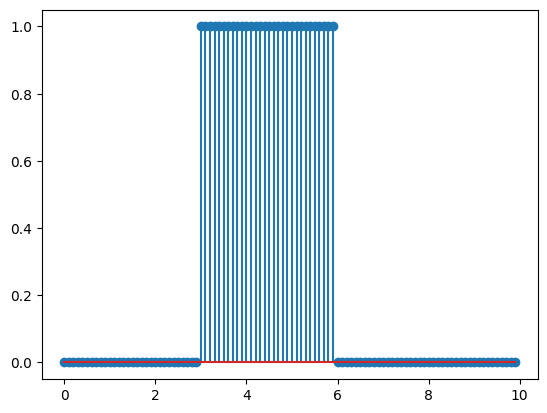

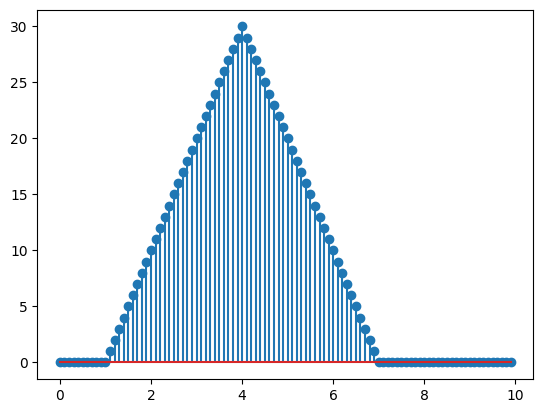

In [ ]:
import matplotlib.pylab as plt

dt = 0.1
t = np.arange(0, 10, dt)
x = np.heaviside(t-3, 1) - np.heaviside(t-6, 1)
Convolution = np.convolve(x, x, 'same')

plt.stem(t, x)
plt.show()
plt.stem(t, Convolution)
plt.show()

[0.5 1.5 2.5 3.5 4.5 2.5]
[0.5 1.5 2.5 3.5 4.5]


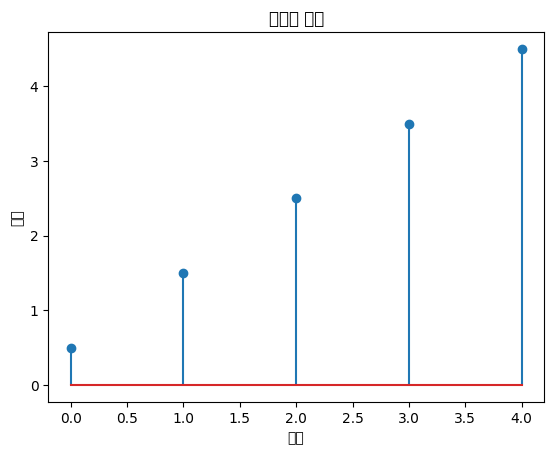

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 입력 신호
x = np.array([1, 2, 3])

# 시스템 임펄스 응답 (시스템의 특성을 나타내는 신호)
h = np.array([0.5, 0.5])

import numpy as np

# 입력 신호 생성
x = np.array([1, 2, 3, 4, 5])

# 시스템의 임펄스 응답 (커널)
h = np.array([0.5, 0.5])

# 합성곱 연산
y = np.convolve(x, h, mode='full')

print(y)

# 합성곱 연산
y = np.convolve(x, h, mode='same')

# 결과 출력
print(y)
plt.stem(y)
plt.xlabel('시간')
plt.ylabel('진폭')
plt.title('합성곱 결과')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 신호 생성
time = np.linspace(0, 1, 100)
signal = np.sin(2 * np.pi * 50 * time) + np.random.randn(100)  # 신호 + 노이즈

# 평균 필터 (3개의 샘플 평균)
kernel = [0.1, 0.2, 0.3] # np.ones(3) / 3
print(kernel)
# 합성곱 연산
filtered_signal = np.convolve(signal, kernel, mode='same')

# 시각화
plt.plot(time, signal, label='Noisy Signal')
plt.plot(time, filtered_signal, label='Filtered Signal')
plt.legend()
plt.show()

In [ ]:
ooptinf['month']ambda x : round(int(x) / 2.5)

ooptinf['month']ge(0, 1000, 2.5).astype(np.uint1optinf['month'].zeros((3,int(1000/2.5))).astypeoptinf['month']= {}

posi_dic = {'prem':np.arraoptinf['month']b), 'dosu':np.array(ob)}
optinf[optinf['month'], 'code':'', 'atm':0, 'posi':posoptinf['month'], 'ordqty':0, 'ordmi':[] }

prinoptinf['month']t'])optinf['month']optinf['monthoptinf['month']['mooptinf['month']inf['moptinf['month']tinf['month']

SyntaxError: closing parenthesis ')' does not match opening parenthesis '{' (<ipython-input-1-8bbf21fddba5>, line 5)

In [ ]:
import numpy as np

xx_idx_  = lambda x : round(int(x) / 2.5)
xx_dot_  = lambda x : int(x)+0.5 if int(x)%10 in (2,7) else x

ord_cnt_ = lambda x: (np.repeat([-1,-2,-3], [9,2,1])[min(x,11)], np.repeat([-1,0,1], [4,4,4])[min(x,11)])

data0 = np.arange(0, 1000, 2.5).astype(np.uint16)
data3 = np.zeros((3, int(1000/2.5)), dtype=np.float32)

optinf = {}
optinf['month'] = { 'gubun': '',
                    'code' : '',
                    'atm'  : 0,
                    'count': np.vstack((data0, data3)),
                    'premi': np.vstack((data0, data3)),
                    'ordbas': 0,
                    'ordmi' : []
                  }

In [ ]:

optinf['month']['count'][2, xx_idx_(335)] = 0

optinf['month']['count'][2, xx_idx_(337)] = -1
optinf['month']['count'][3, xx_idx_(337)] = 0

optinf['month']['count'][2, xx_idx_(340)] = -1
optinf['month']['count'][3, xx_idx_(340)] = -1

optinf['month']['count'][2, xx_idx_(342)] = -1
optinf['month']['count'][3, xx_idx_(342)] = 0

optinf['month']['count'][2, xx_idx_(345)] = -1
optinf['month']['count'][3, xx_idx_(345)] = -1

optinf['month']['count'][2, xx_idx_(347)] = -1
optinf['month']['count'][3, xx_idx_(347)] = -1

optinf['month']['count'][2, xx_idx_(350)] = -1
optinf['month']['count'][3, xx_idx_(350)] = -1

optinf['month']['count'][2, xx_idx_(352)] = 0
optinf['month']['count'][3, xx_idx_(352)] = -1

optinf['month']['count'][2, xx_idx_(355)] = -1
optinf['month']['count'][3, xx_idx_(355)] = 0

posi = optinf['month']['count'][:, xx_idx_(332):xx_idx_(360)]
posi

array([[332., 335., 337., 340., 342., 345., 347., 350., 352., 355., 357.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.],
       [  0.,   0.,   0.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,   0.,   0.]],
      dtype=float32)

In [ ]:
posi[0, :5], posi[2, :6], list(posi[3, 6-1:])

(array([332., 335., 337., 340., 342.], dtype=float32),
 array([ 0.,  0., -1., -1., -1., -1.], dtype=float32),
 [-1.0, -1.0, -1.0, -1.0, -1.0, 0.0])

In [ ]:
a1 = posi[0, np.any(posi[2:,] != 0, axis=0)]
a1

array([337., 340., 342., 345., 347., 350., 352., 355.], dtype=float32)

In [ ]:
a11 = sorted(tuple( map(xx_idx_, a1)))
a11

[135, 136, 137, 138, 139, 140, 141, 142]

In [ ]:
# posi[:, np.all(posi[2:,] <= -1, axis=0)][0,:]
a2 = posi[0, np.all(posi[2:,] <= -1, axis=0)]
a2

array([340., 345., 347., 350., 355.], dtype=float32)

In [ ]:
a3 = sorted(list( map(xx_idx_, set(a2))))
a3, np.diff(a3)

([136, 138, 139, 140, 142], array([2, 1, 1, 2]))

In [ ]:
any(np.diff(a3) >= 1)

True

In [ ]:
np.split(a3, np.where(np.diff(a3) > 1)[0] + 1)

[array([136]), array([138, 139, 140]), array([142])]

In [ ]:
centre_group = np.split(a3, np.where(np.diff(a3) != 1)[0] + 1)
centre_group

[array([136]), array([138, 139, 140]), array([142])]

In [ ]:
 mama = max(centre_group, key=len)
 mama, len(mama)

(array([138, 139, 140]), 3)

In [ ]:
min(mama), max(mama)

(138, 140)

In [ ]:
optinf['month']['count'][:, min(a11):min(mama)]

array([[337., 340., 342.],
       [  0.,   0.,   0.],
       [ -1.,  -1.,  -1.],
       [  0.,   0.,   0.]], dtype=float32)

In [ ]:
ord_cnt_ = lambda x: (np.repeat([-1,-2,-3], [10,2,1])[min(x,12)], np.repeat([-1,0,1], [5,4,4])[min(x,12)])

In [ ]:
list(map(ord_cnt_, range(16) ))

[(-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, 0),
 (-1, 0),
 (-1, 0),
 (-1, 0),
 (-1, 1),
 (-2, 1),
 (-2, 1),
 (-3, 1),
 (-3, 1),
 (-3, 1),
 (-3, 1)]

In [ ]:
[ord_cnt_(11)] * 2, np.array([ord_cnt_(11)] * 2).T, np.array([ord_cnt_(11)] * 2) , np.array(list(ord_cnt_(11)) * 2).T, np.array(list(ord_cnt_(11)) * 2)

## np.array((ord_cnt_(11)) * 2).T * np.identity(2)

([(-3, 1), (-3, 1)],
 array([[-3, -3],
        [ 1,  1]]),
 array([[-3,  1],
        [-3,  1]]),
 array([-3,  1, -3,  1]),
 array([-3,  1, -3,  1]))

In [ ]:

oss_matrix = {'tobe'  : np.zeros((4,2),dtype='uint16'),
              'posi'  : np.zeros((4,2),dtype='uint16'),
              'filter': np.zeros((4,2),dtype='uint16'),
              'order' : np.zeros((4,2),dtype='uint16')
             }

posi = optinf['month']['count'][:, np.any(optinf['month']['count'][2:,] != 0, axis=0)]
posi_idx = sorted(list( map(xx_idx_, posi[0,:])))
print( posi_idx )
print( posi )

centres = posi[:, np.all(posi[2:,] <= -1, axis=0)]
centres_idx = sorted(list( map(xx_idx_, centres[0,:])))
print( centres_idx )
print( centres )

centre_group = np.split(centres_idx, list(np.where(np.diff(centres_idx) != 1)[0] + 1))
centre_idx = max(centre_group, key=len)
print(centre_idx, int(np.median(centre_idx)))

posi_len  = max(posi_idx)   - min(posi_idx) + 1
centr_len = max(centre_idx) - min(centre_idx) + 1

ord_len_left  = max(centre_idx) - min(posi_idx) + 1
ord_len_right = max(posi_idx)   - min(centre_idx) + 1
print(ord_len_left, ord_len_right)

if 1 < 2 :
  ord_len = ord_len_left
else:
  ord_len = ord_len_right

ord_len = 8

oss_matrix['posi'] = optinf['month']['count'][:,135:137]   #   가상 atm 추출  <<<<<<<<  주의  [:,135:137]  fixed
print(oss_matrix['posi'], '<-'*5)

oss_matrix['tobe'] = np.array([ord_cnt_(ord_len)] * 2).T.astype(np.int32)

if ord_len < 4:
  oss_matrix['tobe'] *= np.identity(2, dtype=np.int32)
elif ord_len < 8:
  oss_matrix['tobe'] *= np.identity(2, dtype=np.int32)
  oss_matrix['tobe'][:, int( 1 < 2)] = 0  # atm < np.median(center)
else:
  oss_matrix['tobe'][:, int( 1 < 2)] = 0  # atm < np.median(center)

print(oss_matrix['tobe'])

oss_matrix['filter'] = np.where(oss_matrix['tobe'] != 0, 1, oss_matrix['tobe'])
print(oss_matrix['filter'])

oss_matrix['order'] = oss_matrix['posi'].copy()
oss_matrix['order'][2:,:] = (oss_matrix['tobe'] - oss_matrix['posi'][2:,:]) * oss_matrix['filter']
print(oss_matrix['order'])


In [ ]:

(matrix_tobe, matrix_posi, matrix_filter, matrix_order) = (np.empty((0,0), dtype=np.int16),) * 4

posi = optinf['month']['count'][:, np.any(optinf['month']['count'][2:,] != 0, axis=0)]
posi_idx = sorted(list( map(xx_idx_, posi[0,:]) ));                                       print( posi_idx ); print( posi )

centre = posi[:, np.all(posi[2:,] <= -1, axis=0)]
centre_idx = sorted(list( map(xx_idx_, centre[0,:]) ));                                   print( centre_idx ); print( centre )

if len(centre_idx) > 1:
  centre_grp = np.split(centre_idx, list( np.where(np.diff(centre_idx) != 1)[0] + 1 ))
  centre_idx = max(centre_grp, key=len);

atm_idx = [134]

if len(centre_idx) < 4:
  matrix_tobe =  np.array([ord_cnt_( len(centre_idx) )] * 2).T.astype(np.int32)
  matrix_tobe *= np.identity(2, dtype=np.int32)

  atm_idx.append(134+1)  # sorted list  134:135

  """
    if 상승:
      atm_idx.insert(0,atm-1)   [atm-1, atm]
    elif 하락:
      atm_idx.append(atm+1)  [atm, atm+1]
    else:
      return {}
  """
else:

  if atm_idx < min(centre_idx):
    posi_size = max(centre_idx) - min(posi_idx) + 1
    matrix_tobe = np.array([ord_cnt_( posi_size )] * 1).T.astype(np.int32)

  elif max(centre_idx) < atm_idx :
    posi_size = max(posi_idx) - min(centre_idx) + 1
    matrix_tobe = np.array([ord_cnt_( posi_size )] * 1).T.astype(np.int32)
    matrix_tobe = np.flip(matrix_tobe)
  else:
    print(' atm in centre area ~~ ')  #  len(centre_idx) < 4  와 동일하게 처리  <-  모순 ? 중복처리 ?

matrix_filter = np.where(matrix_tobe != 0, 1, matrix_tobe);                   print(matrix_tobe); print(matrix_filter)

matrix_posi = optinf['month']['count'][:,atm_idx];                            print(matrix_posi, '<-'*5, 'posi')

matrix_order = matrix_posi.copy()
matrix_order[2:,:] = (matrix_tobe - matrix_posi[2:,:]) * matrix_filter;       print(matrix_order)

ord_dict ={}
if np.any(matrix_order[2:,:] != 0):

  matrix_order[1] = matrix_order[0]
  rows, cols = np.where(matrix_order[0] > matrix_order)

  for row, col in zip(rows, cols):
      if matrix_order[row, col] == 0:
          continue
      ord_code = f"{int(row):1d}code{int(matrix_order[0,col]):3d}"      #  code  수정
      if len(ord_code) != 8 or ord_code.isspace() or not ord_code.startswith(('2', '3')):
          print(f"> 종목코드 : {ord_code} 비정상임.")
      else:
          ord_dict[ord_code] = int(matrix_order[row, col])
print(ord_dict)

[135, 136, 137, 138, 139, 140, 141, 142]
[[337. 340. 342. 345. 347. 350. 352. 355.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [ -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [  0.   0.   0.  -1.  -1.  -1.  -1.  -1.]]
[138, 139, 140, 142]
[[345. 347. 350. 355.]
 [  0.   0.   0.   0.]
 [ -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.]]
[[-1  0]
 [ 0 -1]]
[[1 0]
 [0 1]]
[[335. 337.]
 [  0.   0.]
 [  0.  -1.]
 [  0.   0.]] <-<-<-<-<- posi
[[335. 337.]
 [  0.   0.]
 [ -1.   0.]
 [  0.  -1.]]
{'2code335': -1, '3code337': -1}


In [ ]:
rows, cols = np.where(matrix_order != 0)
rows, cols

strike_price  367.5
strike_price  365
sign_changes [38 56] 345 38 [-95.  -92.5 -90.  -87.5 -85.  -82.5 -80.  -77.5 -75.  -72.5 -70.  -67.5
 -65.  -62.5 -60.  -57.5 -55.  -52.5 -50.  -47.5 -45.  -42.5 -40.  -37.5
 -35.  -32.5 -30.  -27.5 -25.  -22.5 -20.  -17.5 -15.  -12.5 -10.   -7.5
  -5.   -2.5   0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   20.
  17.5  15.   12.5  10.    7.5   5.    2.5   0.   -2.5  -5.   -7.5 -10.
 -12.5 -15.  -17.5 -20.  -22.5 -25.  -27.5 -30.  -32.5 -35.  -37.5 -40. ]
 절편 :  [345.0, 387.5], 42.50 
strike_price  365
strike_price  362.5
sign_changes [38 55] 345 38 [-187.5 -182.5 -177.5 -172.5 -167.5 -162.5 -157.5 -152.5 -147.5 -142.5
 -137.5 -132.5 -127.5 -122.5 -117.5 -112.5 -107.5 -102.5  -97.5  -92.5
  -87.5  -82.5  -77.5  -72.5  -67.5  -62.5  -57.5  -52.5  -47.5  -42.5
  -37.5  -32.5  -27.5  -22.5  -17.5  -12.5   -7.5   -2.5    2.5    7.5
   12.5   17.5   22.5   27.5   32.5   37.5   40.    37.5   32.5   27.5
   22.5   17.5   12.5    7.5    2.5   -2.5   -

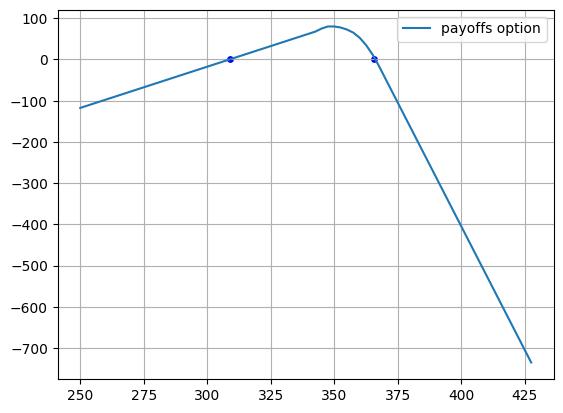

(array([-117.5, -112.5, -107.5, -102.5,  -97.5,  -92.5,  -87.5,  -82.5,
         -77.5,  -72.5,  -67.5,  -62.5,  -57.5,  -52.5,  -47.5,  -42.5,
         -37.5,  -32.5,  -27.5,  -22.5,  -17.5,  -12.5,   -7.5,   -2.5,
           2.5,    7.5,   12.5,   17.5,   22.5,   27.5,   32.5,   37.5,
          42.5,   47.5,   52.5,   57.5,   62.5,   67.5,   75. ,   80. ,
          80. ,   77.5,   72.5,   65. ,   52.5,   35. ,   12.5,  -15. ,
         -45. ,  -75. , -105. , -135. , -165. , -195. , -225. , -255. ,
        -285. , -315. , -345. , -375. , -405. , -435. , -465. , -495. ,
        -525. , -555. , -585. , -615. , -645. , -675. , -705. , -735. ]),
 72)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

spot_price_range = np.arange(250, 430, 2.5)

# payoff = lambda option, spot_price_range, strike_price, premium, count : np.sign(count) * np.maximum((1 if option == 'call' else -1) * (spot_price_range - strike_price), 0) * abs(count) + premium * abs(count)

payoff = lambda option, spot_price_range, strike_price, premium, count : (np.maximum((1 if option == 'call' else -1) * (spot_price_range - strike_price), 0) - premium ) * count

payoffs = np.zeros(len(spot_price_range), dtype=float)

options = [
            ('call', 367.5, 10, -1), ('put',  365,    10, -1),
            ('call', 365,   10, -1), ('put',  362.5,  10, -1),
            ('call', 362.5, 10, -1), ('put',  360,    10, -1),
            ('call', 360  , 10, -1), ('put',  357.5,  10, -1),
            ('call', 357.5, 10, -1), ('put',  355,    10,  0),
            ('call', 355,   10, -1), ('put',  352.5,  10,  0),
            ('call', 352.5, 10, -1), ('put',  350,    10,  0),
            ('call', 350,   10, -1), ('put',  347.5,  10,  0),
            ('call', 347.5, 10, -2), ('put',  345,    10,  1),
            ('call', 345,   10, -2), ('put',  342.5,  10,  1),
            ]
            # ------------------------------------------------------------

for ii, (option_type, strike_price, premium, count) in enumerate(options): # [::-1]):

    payoffs += payoff(option_type, spot_price_range, strike_price, premium, count)
    print('strike_price ', strike_price)
    if ii % 2 == 0:
      continue

    signs = np.sign(payoffs)
    signs[signs == 0] = 1

    sign_changes = np.where(np.diff(signs) != 0)[0] + 1

    ## print('sign_changes', sign_changes, payoffs[sign_changes[0]])
    print('sign_changes', sign_changes, int(spot_price_range[sign_changes[0]]), sign_changes[0], payoffs)

    x_intercept = []

    for idx in sign_changes:

      x = spot_price_range[idx-3:idx+3]
      y = payoffs[idx-3:idx+3]

      a, b = np.polyfit(x, y, deg=1)
      x_intercept.append(round(-b/a, 2))

      # plt.scatter( x_intercept, (0,)*len(x_intercept), color='blue', s=5)

    if len(x_intercept) == 2:
      print( f" 절편 :  {x_intercept}, {round(np.diff(x_intercept)[0],2):.2f} " )
    else:
      print(" 비정상 절편 :",  x_intercept)

plt.scatter( x_intercept, (0,)*len(x_intercept), color='blue', s=15)

plt.plot(spot_price_range, payoffs, label=f'{"payoffs"} option')
plt.legend()
plt.grid(True)
plt.show()

payoffs, len(payoffs)

[13 30] <class 'numpy.ndarray'>
[324.38, 365.24]


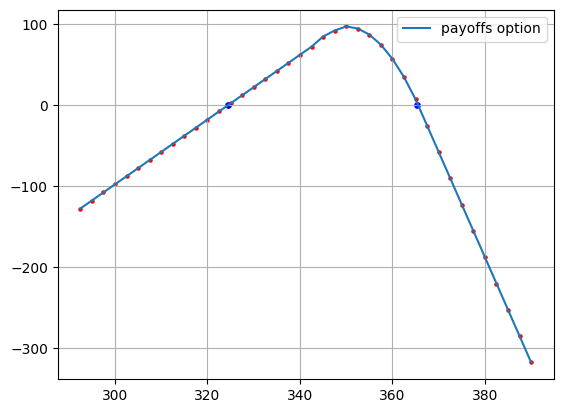

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

positions = [
            ('call', 367.5, 10,  0), ('put',  365,    10, -1),
            ('call', 365,   10, -1), ('put',  362.5,  10, -1),
            ('call', 362.5, 10, -1), ('put',  360,    10, -1),
            ('call', 360  , 10, -1), ('put',  357.5,  10, -1),
            ('call', 357.5, 10, -1), ('put',  355,    10, -1),
            ('call', 355,   10, -1), ('put',  352.5,  10, -1),
            ('call', 352.5, 10, -1), ('put',  350,    10, -1),
            ('call', 350,   10, -2), ('put',  347.5,  10,  1),
            ('call', 347.5, 10, -2), ('put',  345,    10,  1),
            ('call', 345,   10, -3), ('put',  342.5,  10,  1),

            ]

def posi_intercept(options):

    xx = [option[1] for option in options]
    spot_price_range = np.arange(min(xx)-50, min(xx)+50, 2.5)

    payoff_ = lambda option, strike_price, premium, count : ( np.maximum((1 if option == 'call' else -1) * (spot_price_range - strike_price), 0) - premium ) * count

    payoffs = np.sum(tuple(map(payoff_, *zip(*options))), axis=0)

    signs = np.where(payoffs != 0, np.sign(payoffs), 1)
    sign_changes = np.where(np.diff(signs) != 0)[0] + 1
    print(sign_changes, type(sign_changes))

    x_intercept = []
    for idx in sign_changes:
      x = spot_price_range[idx-3:idx+3]
      y = payoffs[idx-3:idx+3]
      a, b = np.polyfit(x, y, deg=1)
      x_intercept.append(round(-b/a, 2))
      # x_intercept.append(np.interp(0, y, x))

    # x_intercept = [map(payoffs, sign_changes)]
    plt.scatter( spot_price_range, payoffs, color='red', s=5)
    plt.plot(spot_price_range, payoffs, label=f'{"payoffs"} option')

    return x_intercept


x_intercept = posi_intercept(positions)
print(x_intercept)

plt.scatter( x_intercept, (0,)*len(x_intercept), color='blue', s=15)


plt.legend()
plt.grid(True)
plt.show()
# [331.75, 371.44]

x_intercept.append(np.interp(0, y, x))   
[335.25, 380.0]

a, b = np.polyfit(x, y, deg=1)

x_intercept.append(round(-b/a, 2))

[335.25, 374.86]

In [ ]:
import numpy as np

positions = [
            ('call', 367.5, 10, -1), ('put',  365,    10, -1),
            ('call', 365,   10, -1), ('put',  362.5,  10, -1),
            ('call', 362.5, 10, -1), ('put',  360,    10, -1),
            ('call', 360  , 10, -1), ('put',  357.5,  10, -1),
            ('call', 357.5, 10, -1), ('put',  355,    10,  0),
            ('call', 355,   10, -1), ('put',  352.5,  10,  0),
            ('call', 352.5, 10, -1), ('put',  350,    10,  0),
            ('call', 350,   10, -2), ('put',  347.5,  10,  0),
            ('call', 347.5, 10, -2), ('put',  345,    10,  1),
            ('call', 345,   10, -3), ('put',  342.5,  10,  1),
            ]

def posi_intercept(options):

    xx = [option[1] for option in options]
    spot_price_range = np.arange(min(xx)-50, max(xx)+50, 2.5)

    def posi_payoff(option, strike_price, premium, count):
      option_sign = 1 if option == 'call' else -1
      # return (np.sign(count) * np.maximum(option_sign * (spot_price_range - strike_price), 0) + premium ) * abs(count)
      return (np.maximum(option_sign * (spot_price_range - strike_price), 0) - premium) * count

    payoffs = np.sum(tuple( map(posi_payoff, *zip(*options)) ), axis=0)

    signs = np.where(payoffs != 0, np.sign(payoffs), 1)
    sign_changes = np.where(np.diff(signs) != 0)[0] + 1

    def xx_inter(idx):
      x = spot_price_range[idx-3:idx+3]
      y = payoffs[idx-3:idx+3]
      a, b = np.polyfit(x, y, deg=1)
      return round(-b/a, 2)

    return tuple( map(xx_inter, sign_changes) )


# 1~4구간은 동일, 5~8은 점진적으로 조금씩 상승,  매수 포지션
tmp = 0
for idx in range(2, len(positions)):
  if idx % 2 == 0:
    x_intercept = posi_intercept(positions[:idx])
    # print(f"{max(tmp-x_intercept[0],0):0.2f}", x_intercept)

    dis = abs( round(x_intercept[0]-positions[idx][1], 2) )
    print(f"{idx:2d} { tmp-x_intercept[0] :0.2f} {x_intercept} {np.diff(np.array(x_intercept))[0]:0.2f}  {dis:0.2f}")
    tmp = x_intercept[0]

 2 -345.00 (345.0, 387.5) 42.50  20.00
 4 1.25 (343.75, 386.25) 42.50  18.75
 6 1.25 (342.5, 385.0) 42.50  17.50
 8 1.25 (341.25, 383.75) 42.50  16.25
10 2.50 (338.75, 380.5) 41.75  16.25
12 2.50 (336.25, 377.92) 41.67  16.25
14 2.50 (333.75, 375.71) 41.96  16.25
16 5.00 (328.75, 372.19) 43.44  18.75
18 8.75 (320.0, 368.43) 48.43  25.00



```
2 -345.00 (345.0, 387.5) 20.00
4 1.25 (343.75, 386.25) 18.75
6 1.25 (342.5, 385.0) 17.50
8 1.25 (341.25, 383.75) 16.25
10 1.25 (340.0, 381.94) 15.00
12 1.25 (338.75, 380.25) 13.75
14 4.46 (334.29, 379.55) 15.71
16 5.54 (328.75, 378.75) 18.75


In [ ]:
import numpy as np

ord_cnt_ = lambda x: (np.repeat([-1,-2,-3], [8,2,2])[min(x,11)], np.repeat([-1,0,1], [4,4,4])[min(x,11)])

for i in range(14):
  print(i, ord_cnt_(i))

In [ ]:
pp = [x for x in range(-3, 4) if x != 0]

qq = [(put_cnt, call_cnt) for put_cnt in pp for call_cnt in pp  if put_cnt != call_cnt and put_cnt < 0 and abs(put_cnt) != abs(call_cnt)]
print(len(qq))
for i in qq:
  print(i)


12
(-3, -2)
(-3, -1)
(-3, 1)
(-3, 2)
(-2, -3)
(-2, -1)
(-2, 1)
(-2, 3)
(-1, -3)
(-1, -2)
(-1, 2)
(-1, 3)


In [ ]:
import numpy as np

# -3부터 3까지의 숫자 중 0을 제외한 배열 생성
pp_arr = np.arange(-3, 4)[np.arange(-3, 4) != 0]
put_cnt, call_cnt = np.meshgrid(pp_arr, pp_arr)
print(pp_arr * pp_arr.reshape(6, 1))

result = np.stack((put_cnt.flatten(), call_cnt.flatten()), axis=1)


[[ 9  6  3 -3 -6 -9]
 [ 6  4  2 -2 -4 -6]
 [ 3  2  1 -1 -2 -3]
 [-3 -2 -1  1  2  3]
 [-6 -4 -2  2  4  6]
 [-9 -6 -3  3  6  9]]


In [ ]:
import numpy as np

# 두 개의 벡터 생성
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# 각 원소의 합을 구하는 함수
def add(x, y):
    return x + y

# map 함수를 이용하여 각 원소의 합 계산
result = list(map(add, a, b))
print(result)  # 출력: [5, 7, 9]

[5, 7, 9]


In [ ]:
import numpy as np

# x축, y축 값을 가지는 배열 생성
x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8]).reshape(4, 1)  # .squeeze()  # (4, 1) -> (4,)

# 각 요소별 곱셈을 수행하는 함수 (수정)
def multiply(pair):
    a, b = pair
    return a * b

# map 함수를 이용한 연산 (개선)
result_map = list(map(multiply, zip(x, y)))
print("map 함수 결과:", result_map)

# 벡터화 연산 (더욱 효율적)
result_vectorized = x * y
print("벡터화 연산 결과:", result_vectorized)

map 함수 결과: [array([5]), array([12]), array([21]), array([32])]
벡터화 연산 결과: [[ 5 10 15 20]
 [ 6 12 18 24]
 [ 7 14 21 28]
 [ 8 16 24 32]]


In [ ]:
import numpy as np

def payoff_(positions):

    def payoff(option, strike_price, premium, count):
      option_sign = 1 if option == 'call' else -1
      return (np.maximum(option_sign * (spot_price_range - strike_price), 0) - premium) * count

    return np.sum(tuple( map(payoff, *zip(*positions)) ), axis=0)

def intercept_(payoff):

    sign_change = np.where(np.sign(payoff[:-1]) != np.sign(payoff[1:]))[0] + 1

    # print(sign_change)

    def xx_inter(idx):
      x = spot_price_range[idx-3:idx+3]
      y = payoff[idx-3:idx+3]
      a, b = np.polyfit(x, y, deg=1)
      return round(-b/a, 2)

    return tuple( map(xx_inter, sign_change) )

In [ ]:
import numpy as np

class OptionPayoff:
    def __init__(self, spot_price_range):
        self.spot_price_range = spot_price_range

    def payoff(self, option, strike_price, premium, count):
        option_sign = 1 if option == 'call' else -1
        return np.maximum(option_sign * (self.spot_price_range - strike_price), 0) * count + premium * abs(count)

    def total_payoff(self, positions):
        return np.sum(tuple(map(self.payoff, *zip(*positions))), axis=0)

    def intercept_points(self, payoff):
        sign_change = np.where(np.sign(payoff[:-1]) != np.sign(payoff[1:]))[0] + 1

        def xx_inter(idx):
            x = self.spot_price_range[idx-3:idx+3]
            y = payoff[idx-3:idx+3]
            a, b = np.polyfit(x, y, deg=1)
            return round(-b/a, 2)

        return tuple(map(xx_inter, sign_change))

In [ ]:

positions = [
            ('call', 367.5, 10, -1), ('put',  365,    10, -1),
            ('call', 365,   10, -1), ('put',  362.5,  10, -1),
            ('call', 362.5, 10, -1), ('put',  360,    10, -1),
            ('call', 360  , 10, -1), ('put',  357.5,  10, -1),
            ('call', 357.5, 10, -1), ('put',  355,    10,  0),
            ('call', 355,   10, -1), ('put',  352.5,  10,  0),
            ('call', 352.5, 10, -1), ('put',  350,    10,  0),
            ('call', 350,   10, -2), ('put',  347.5,  10,  0),
            ('call', 347.5, 10, -2), ('put',  345,    10,  1),

            ]


xx = [option[1] for option in positions]
spot_price_range = np.arange(min(xx)-50, max(xx)+50, 2.5)

tmp = 0
for idx in range(2, len(positions)):
  if idx % 2 == 0:
    x_intercept = intercept_(payoff_(positions[:idx]))

    dis = abs( round(x_intercept[0]-positions[idx][1], 2) )
    print(f"{idx:2d} { tmp-x_intercept[0] :0.2f} {x_intercept} {np.diff(np.array(x_intercept))[0]:0.2f}  {dis:0.2f}")
    tmp = x_intercept[0]


new_adds = [ ('call', 345, 10, -3), ('put',  342.5,    10, 1) ]

# print(payoff_(positions))
# print(payoff_(new_adds))
aa = np.add(payoff_(positions), payoff_(new_adds))
print(aa)
print(intercept_(aa) )

'''
for idx in range(len(new_adds)):
  print(idx, new_adds[idx])
  x_intercept = intercept_(np.add(payoff_(positions), payoff_(new_adds[idx])))
  print(x_intercept)
'''

 2 -345.00 (345.0, 345.0, 387.5, 387.5) 0.00  20.00
 4 1.25 (343.75, 386.25) 42.50  18.75
 6 1.25 (342.5, 342.5, 385.0, 385.0) 0.00  17.50
 8 1.25 (341.25, 383.75) 42.50  16.25
10 2.50 (338.75, 380.5) 41.75  16.25
12 2.50 (336.25, 377.92) 41.67  16.25
14 2.50 (333.75, 375.71) 41.96  16.25
16 5.00 (328.75, 372.19) 43.44  18.75
[  -7.5   -2.5    2.5    7.5   12.5   17.5   22.5   27.5   32.5   37.5
   42.5   47.5   52.5   57.5   62.5   67.5   72.5   77.5   82.5   87.5
   95.    97.5   95.    87.5   77.5   65.    47.5   25.    -2.5  -35.
  -70.  -105.  -140.  -175.  -210.  -245.  -280.  -315.  -350.  -385.
 -420.  -455.  -490.  -525.  -560.  -595.  -630.  -665.  -700. ]


TypeError: expected non-empty vector for x

In [ ]:
import numpy as np

class OptionPayoffCalculator:
    def __init__(self, spot_price_range):
        self.spot_price_range = spot_price_range
        self.tmp = 0.0

    def calculate_payoff(self, positions):

        def single_option_payoff(option, strike_price, premium, count):
            option_sign = 1 if option == 'call' else -1
            return (np.maximum(option_sign * (self.spot_price_range - strike_price), 0) - premium) * count

        return np.sum(tuple(single_option_payoff(*position) for position in positions), axis=0)

    def find_breakeven_points(self, payoff):

        sign_payoff = np.sign(payoff)
        sign_payoff[sign_payoff == 0] = 1
        sign_change = np.where(np.diff(sign_payoff))[0] + 1

        def interpolate_breakeven(idx):
          x = spot_price_range[idx-3:idx+3]
          y = payoff[idx-3:idx+3]
          a, b = np.polyfit(x, y, deg=1)
          return round(-b/a, 2)

        return tuple( map(interpolate_breakeven, sign_change) )

    def analyze_strategy1(self, positions):
        payoff = self.calculate_payoff(positions)
        breakeven_points = self.find_breakeven_points(payoff)

        dis = abs( round(breakeven_points[0]-np.mean(breakeven_points), 2) )

        print(breakeven_points, np.diff(breakeven_points), f'{self.tmp - breakeven_points[0]:.2f}', dis)
        self.tmp = breakeven_points[0]

    def analyze_strategy2(self, positions):

        posi = positions[:, np.any(positions[2:,] != 0, axis=0)]

        positions = []
        for col in range(posi.shape[1]):
            if posi[2, col] != 0:
              positions.append(( 'call', xx_dot_(posi[0, col]), 10 , posi[2, col] ))
            if posi[3, col] != 0:
              positions.append(( 'put',  xx_dot_(posi[0, col]), 10 , posi[3, col] ))

        payoff = self.calculate_payoff(positions)
        breakeven_points = self.find_breakeven_points(payoff)
        print( breakeven_points, np.diff(breakeven_points) )

# #######################################################

strategy = [
            ('call', 367.5, 10, -0), ('put',  365,    10, -1),
            ('call', 365,   10, -1), ('put',  362.5,  10, -1),
            ('call', 362.5, 10, -1), ('put',  360,    10, -1),
            ('call', 360  , 10, -1), ('put',  357.5,  10, -1),
            ('call', 357.5, 10, -1), ('put',  357.5,  10, -0),
            ('call', 355,   10, -1), ('put',  355,    10, -0),
            ('call', 352.5, 10, -1), ('put',  352.5,  10, -0),
            ('call', 350,   10, -1), ('put',  350,    10, -0),
            ('call', 347.5, 10, -1), ('put',  347.5,  10,  1),
            ('call', 345,   10, -1), ('put',  345,    10,  1),
            ]

new_add1 = [ ('call', 342.5, 10, -1), ('put',  342.5, 10, 1) ]

new_add2 = [ ('call', 342.5, 10, -2), ('put',  342.5, 10, 1) ]

xx = [option[1] for option in strategy]
spot_price_range = np.arange(min(xx)-100.0, max(xx)+100.0, 2.5)

calculator = OptionPayoffCalculator(spot_price_range)

# calculator.analyze_strategy(strategy)

# #######################################################
print( 'payoff_posi' )
payoff_posi = calculator.calculate_payoff(strategy)
print( payoff_posi )
break_posi = calculator.find_breakeven_points(payoff_posi)
print( break_posi, np.diff(break_posi), '\n' )

print( 'payoff_add' )
payoff_add1 = calculator.calculate_payoff(new_add1)
break_add1 = calculator.find_breakeven_points(payoff_add1)

payoff_add2 = calculator.calculate_payoff(new_add2)
break_add2 = calculator.find_breakeven_points(payoff_add2)

print( 'payoff_sim' )
aaa = np.sum((payoff_posi, payoff_add1), axis=0)
break_sim = calculator.find_breakeven_points(aaa)
print( break_sim, np.diff(break_sim), '\n' )

aaa = np.sum((payoff_posi, payoff_add2), axis=0)
break_sim = calculator.find_breakeven_points(aaa)
print( break_sim, np.diff(break_sim), '\n' )


calculator.analyze_strategy1(  strategy  )
print()

# calculator.analyze_strategy2( optinf['month']['count'] )
# print()

for idx in range(2, len(strategy)+1):
  if idx % 2 == 0:
    calculator.analyze_strategy1( strategy[:idx] )


payoff_posi
[-152.5 -147.5 -142.5 -137.5 -132.5 -127.5 -122.5 -117.5 -112.5 -107.5
 -102.5  -97.5  -92.5  -87.5  -82.5  -77.5  -72.5  -67.5  -62.5  -57.5
  -52.5  -47.5  -42.5  -37.5  -32.5  -27.5  -22.5  -17.5  -12.5   -7.5
   -2.5    2.5    7.5   12.5   17.5   22.5   27.5   32.5   37.5   42.5
   47.5   52.5   57.5   60.    60.    57.5   50.    37.5   20.    -2.5
  -25.   -47.5  -70.   -92.5 -115.  -137.5 -160.  -182.5 -205.  -227.5
 -250.  -272.5 -295.  -317.5 -340.  -362.5 -385.  -407.5 -430.  -452.5
 -475.  -497.5 -520.  -542.5 -565.  -587.5 -610.  -632.5 -655.  -677.5
 -700.  -722.5 -745.  -767.5 -790.  -812.5 -835.  -857.5 -880. ]
(321.25, 366.93) [45.68] 

payoff_add
payoff_sim
(300.0, 363.97) [63.97] 

(290.0, 362.65) [72.65] 

(321.25, 366.93) [45.68] -321.25 22.84

(355.0,) [] -33.75 0.0
(348.75, 395.0) [46.25] 6.25 23.12
(345.83, 388.75) [42.92] 2.92 21.46
(343.75, 385.83) [42.08] 2.08 21.04
(341.25, 381.25) [40.] 2.50 20.0
(338.75, 378.0) [39.25] 2.50 19.62
(336.25, 375.42)

In [ ]:
import numpy as np

ord_cnt_ = lambda x : (np.repeat((-1,-2,-3), (7,2,3))[min(x,11)], np.repeat((-1,0,1), (4,4,4))[min(x,11)])

In [ ]:
matrix_tobe = np.array([ord_cnt_(4)] * 2).T.astype(np.int16)
matrix_tobe*np.identity(2,dtype=np.int16) , type(matrix_tobe.dtype)

(array([[-1,  0],
        [ 0,  0]], dtype=int16),
 numpy.dtypes.Int16DType)

In [ ]:
np.array([[1,2,3], [3,2,1]]).T

array([[1, 3],
       [2, 2],
       [3, 1]])

In [ ]:
ord_cnt_ = lambda x : [np.repeat((-1,-2,-3), (7,2,3))[min(x,11)], np.repeat((-1,0,1), (4,4,4))[min(x,11)]]

In [ ]:
np.array(list(ord_cnt_(4)) * 3), np.array([ord_cnt_(4)] * 3), np.array((ord_cnt_(4)) * 3)

(array([-1,  0, -1,  0, -1,  0]),
 array([[-1,  0],
        [-1,  0],
        [-1,  0]]),
 array([-1,  0, -1,  0, -1,  0]))

In [ ]:
def get_atm(mw_optinf) -> int:

    opion_sise = mw_optinf['sise'].copy()
    opion_sise[2:][opion_sise[2:] == 0] = 99
    return int( opion_sise[ 0, opion_sise[2:].sum(axis=0).argmin(axis=0) ] )

In [ ]:
def get_atm(mw_optinf) -> int:

    opion_sise = mw_optinf['sise'].copy()

    centre = posi[0, np.all(posi[2:,] <= -1, axis=0)]
    centre_idx = sorted( tuple(map(xx_idx_, centre)) );                         # print(centre_idx); print(centre)

    return int( opion_sise[ 0, opion_sise[2:].sum(axis=0).argmin(axis=0) ] )

In [ ]:
posi

array([[332., 335., 337., 340., 342., 345., 347., 350., 352., 355., 357.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.],
       [  0.,   0.,   0.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,   0.,   0.]],
      dtype=float32)

In [ ]:
pc_idx = np.where(np.all(posi[2:, :] != 0, axis=0))[0]

posi[2:, pc_idx].sum(axis=0).argmin(axis=0)

0

In [ ]:
np.argwhere(np.all(posi[2:, :] != 0, axis=0))

array([[3],
       [5],
       [6],
       [7]])

In [ ]:
import numpy as np

ord_cnt_ = lambda x : (np.repeat((-1,-2,-3), (7,2,3))[min(x,11)], np.repeat((-1,0,1), (4,4,4))[min(x,11)])

for i in range(14):
  print(i, '\n', np.array( [ord_cnt_( i )] * 1).T.astype(np.int16)*np.identity(2,dtype=np.int16) )

In [ ]:
aa = {'daytime':241018100532,'kopi200':348.95,'atm':350,'put':(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.05, 0.05, 0.04, 0.06, 0.06, 0.06, 0.07, 0.08, 0.08, 0.09, 0.09, 0.1, 0.11, 0.12, 0.14, 0.15, 0.17, 0.19, 0.21, 0.24, 0.28, 0.31, 0.36, 0.42, 0.49, 0.58, 0.67, 0.8, 0.95, 1.14, 1.36, 1.64, 1.97, 2.38, 2.87, 3.48, 4.15, 4.99, 5.94, 7.05, 8.25, 9.66, 11.25, 12.9, 15.1, 17.0, 18.6, 19.75, 22.3, 24.6, 26.75, 29.15, 31.5, 33.9, 36.35, 38.8, 41.25, 43.75, 46.25, 48.75, 51.25, 53.7, 56.2, 58.7, 61.2, 63.7, 66.2, 68.7, 71.2, 73.65, 76.15, 78.65, 81.15, 83.65, 86.15, 88.65, 91.1, 93.6, 96.1, 98.6, 101.1, 103.6, 106.1, 108.6, 109.0, 113.55, 116.05, 118.55, 121.05, 123.55, 126.05, 128.55, 131.0, 133.5, 136.0, 138.5, 141.0, 143.5, 146.0, 148.45, 150.95, 153.45, 155.95, 158.45, 160.95, 163.45, 165.95, 168.4, 170.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),'call':(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 138.3, 135.8, 133.35, 130.85, 128.35, 125.9, 123.4, 120.95, 118.5, 116.0, 111.95, 111.1, 108.6, 106.15, 103.65, 101.2, 98.75, 96.25, 93.8, 91.35, 88.85, 86.4, 83.95, 81.5, 79.05, 76.65, 74.2, 71.75, 69.0, 66.8, 62.4, 61.8, 59.3, 56.8, 54.3, 51.8, 49.3, 46.8, 44.3, 41.8, 39.3, 36.8, 34.3, 31.8, 28.15, 27.2, 25.0, 22.85, 19.4, 18.2, 15.7, 13.6, 12.0, 10.4, 8.76, 7.4, 6.19, 5.11, 4.16, 3.35, 2.66, 2.09, 1.64, 1.26, 0.97, 0.74, 0.57, 0.44, 0.34, 0.26, 0.21, 0.16, 0.13, 0.11, 0.09, 0.08, 0.07, 0.05, 0.05, 0.04, 0.04, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)}

In [ ]:
import numpy as np

data0 = np.arange(0, 1000, 2.5).astype(np.uint16)
data1 = np.zeros((1, int(1000/2.5)), dtype=np.float32)
data2 = np.array(aa['call'])
data3 = np.array(aa['put'])

opion_sise = np.vstack((data0, data1, data2, data3))


In [ ]:
xx_idx_  = lambda x : round(int(x) / 2.5)

opion_sise[2:][opion_sise[2:] == 0] = 99
atm = int( opion_sise[ 0, opion_sise[2:].sum(axis=0).argmin(axis=0) ] )
atm, opion_sise[:, xx_idx_(atm)]

(350, array([350.  ,   0.  ,   6.19,   8.25]))

In [ ]:
np.where(opion_sise[2:,] != 0)[0]

In [ ]:
opion_sise[2:].sum(axis=0)

array([198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  ,
       198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  ,
       198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  ,
       198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  ,
       198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  ,
       198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  ,
       198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  ,
       198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  ,
       198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  ,
       198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  , 198.  ,
       198.  , 198.  , 198.  , 198.  , 138.31, 135.82, 133.37, 130.87,
       128.37, 125.92, 123.42, 120.97, 118.53, 116.03, 111.98, 111.13,
       108.63, 106.19, 103.69, 101.24,  98.8 ,  96.3 ,  93.84,  91.41,
        88.91,  86.46,  84.02,  81.58,  79.13,  76.74,  74.29,  71.85,
      

In [ ]:
## np.set_printoptions(precision=2, linewidth=180, suppress=True)
np.set_printoptions(linewidth=180, formatter={'float_kind': '{:10.2f}'.format})
# np.set_printoptions(precision=2, suppress=True)

payoff = np.zeros(400, dtype=np.float32)

for xxx in (320, 322.5, 325):
  payoff += (np.maximum(-1 * (np.arange(0, 1000, 2.5).astype(np.float32) - xxx), 0) - 7.9) * -1

print(payoff[124:128])
print(payoff)

[    -13.80      -6.30       1.20       8.70]
[   -943.80    -936.30    -928.80    -921.30    -913.80    -906.30    -898.80    -891.30    -883.80    -876.30    -868.80    -861.30    -853.80    -846.30    -838.80    -831.30
    -823.80    -816.30    -808.80    -801.30    -793.80    -786.30    -778.80    -771.30    -763.80    -756.30    -748.80    -741.30    -733.80    -726.30    -718.80    -711.30
    -703.80    -696.30    -688.80    -681.30    -673.80    -666.30    -658.80    -651.30    -643.80    -636.30    -628.80    -621.30    -613.80    -606.30    -598.80    -591.30
    -583.80    -576.30    -568.80    -561.30    -553.80    -546.30    -538.80    -531.30    -523.80    -516.30    -508.80    -501.30    -493.80    -486.30    -478.80    -471.30
    -463.80    -456.30    -448.80    -441.30    -433.80    -426.30    -418.80    -411.30    -403.80    -396.30    -388.80    -381.30    -373.80    -366.30    -358.80    -351.30
    -343.80    -336.30    -328.80    -321.30    -313.80    -306.30   

In [ ]:
def find_breakeven_points(exercise_price_range, payoff):

    sign_payoff = np.sign(payoff)
    sign_payoff[sign_payoff == 0] = 1

    sign_change = np.where(np.diff(sign_payoff))[0]
    print(sign_change, payoff[sign_change], payoff[sign_change+1])

    def interpolate_breakeven(idx):
      x = exercise_price_range[idx-3:idx+3]
      y = payoff[idx-3:idx+3]
      print(x, y)
      a, b = np.polyfit(x, y, deg=1)
      return round(-b/a, 2)

    return tuple( map(interpolate_breakeven, sign_change) )

In [ ]:
find_breakeven_points(np.arange(0, 1000, 2.5), bb)

[125] [     -6.30] [      1.20]
[    305.00     307.50     310.00     312.50     315.00     317.50] [    -28.80     -21.30     -13.80      -6.30       1.20       8.70]


(314.6,)

In [ ]:
import numpy as np

xx = np.array([6, 1.1])
count = np.array([0, 1, 2, 3])
target = 10

c1, c2 = np.meshgrid(count, count)

ss = xx[0] * c1 + xx[1] * c2
print(ss)

min_index = np.argmin(np.abs(ss - target))

best_c1 = c1.flatten()[min_index]
best_c2 = c2.flatten()[min_index]

print(f"ss 값이 {target}에 가장 가까울 때:")
print(f"c1 = {best_c1}")
print(f"c2 = {best_c2}")
print(f"{xx[0]} * {best_c1} + {xx[1]} * {best_c2} = {xx[0]*best_c1 + xx[1]*best_c2}")

[[ 0.   6.  12.  18. ]
 [ 1.1  7.1 13.1 19.1]
 [ 2.2  8.2 14.2 20.2]
 [ 3.3  9.3 15.3 21.3]]
ss 값이 10에 가장 가까울 때:
c1 = 1
c2 = 3
6.0 * 1 + 1.1 * 3 = 9.3


In [ ]:
ss_dic = {}

for i in count:
    for j in count:

        result = xx[0] * i + xx[1] * j   #  절편 구하는 function 구현

        ss_dic[(i,j)] = round(result, 2)

print(ss_dic)

{(0, 0): 0.0, (0, 1): 1.1, (0, 2): 2.2, (0, 3): 3.3, (1, 0): 6.0, (1, 1): 7.1, (1, 2): 8.2, (1, 3): 9.3, (2, 0): 12.0, (2, 1): 13.1, (2, 2): 14.2, (2, 3): 15.3, (3, 0): 18.0, (3, 1): 19.1, (3, 2): 20.2, (3, 3): 21.3}


In [ ]:
min_diff = float('inf')

for key, value in ss_dic.items():
    diff = abs(value - 10)  # 값과 목표 값의 차이 계산 (절댓값)
    if diff < min_diff:
        min_diff = diff
        closest_key = key

print(closest_key)

(1, 3)


In [ ]:
best_ij = None
min_diff = float('inf')

xx = np.array([4.1, 0.55])

for i in (1,2,):
    for j in (0,1,2,3,4,5,):
        diff = abs(np.dot(xx, [i, j]) - 10)
        if diff < min_diff:
            min_diff = diff
            best_ij = (i, j)

print(best_ij, np.dot(xx, best_ij))

(2, 3) 9.85


In [ ]:
import numpy as np

xx = np.array([4.1, 0.55])

I, J = np.meshgrid( range(1,3,1), range(0,6,1) )

dot_products = np.dot( xx, np.stack((I.flatten(), J.flatten()), axis=1).T )
min_index = np.argmin( np.abs(dot_products - 10) )
best_ij = (I.flatten()[min_index], J.flatten()[min_index])

print(best_ij, np.dot(xx, best_ij))

(2, 3) 9.85


In [ ]:
best_ij = None
min_diff = float('inf')

xx = np.array([4.1, 0.55])

for i in range(1,3,1):

    diffs = np.abs(xx[0] * i + xx[1] * range(0,6,1) - 10)

    if np.min(diffs) < min_diff:
        best_ij = (i, np.argmin(diffs))

print(best_ij, np.dot(xx, best_ij))

(2, 3) 9.85


In [ ]:

be = np.array([1,2,3,4,5,4,3,2,1])

diffs = np.abs(be - 10)
min_index = np.unravel_index(np.argmin(diffs), diffs.shape)

print(np.argmin(diffs))

4


In [ ]:

X, Y = np.meshgrid(np.arange(3), np.arange(6))

result = [(((2, 6.6, x), (3, 1.1, y))) for x, y in zip(X.flat, Y.flat)]

result

[((2, 6.6, 0), (3, 1.1, 0)),
 ((2, 6.6, 1), (3, 1.1, 0)),
 ((2, 6.6, 2), (3, 1.1, 0)),
 ((2, 6.6, 0), (3, 1.1, 1)),
 ((2, 6.6, 1), (3, 1.1, 1)),
 ((2, 6.6, 2), (3, 1.1, 1)),
 ((2, 6.6, 0), (3, 1.1, 2)),
 ((2, 6.6, 1), (3, 1.1, 2)),
 ((2, 6.6, 2), (3, 1.1, 2)),
 ((2, 6.6, 0), (3, 1.1, 3)),
 ((2, 6.6, 1), (3, 1.1, 3)),
 ((2, 6.6, 2), (3, 1.1, 3)),
 ((2, 6.6, 0), (3, 1.1, 4)),
 ((2, 6.6, 1), (3, 1.1, 4)),
 ((2, 6.6, 2), (3, 1.1, 4)),
 ((2, 6.6, 0), (3, 1.1, 5)),
 ((2, 6.6, 1), (3, 1.1, 5)),
 ((2, 6.6, 2), (3, 1.1, 5))]


## Breakeven 확장 작업

position payoff :  현재 절편 값 계산

현재 (절편값 - atm) > 임계값 조건으로 Breakeven 확장 여부

검토 대상 리스트 만들기 : shift atm 과 centre xx  행사가의 수량 범위

    X, Y = np.meshgrid(np.arange(3), np.arange(6))
    Subject_review = [(((2, 6.6, x), (3, 1.1, y))) for x, y in zip(X.flat, Y.flat)]

예상 절편 계산 :

    Subject_review 별 payoff 계산하고  절편 값 도출
    payoff   = lambda option, spot_price_range, strike_price, premium, count : (np.maximum(option * (spot_price_range - strike_price), 0) - premium) * count

주문 대상 선정 : np.argmin(Subject_review)  



In [ ]:

포지션 변화 event : => 당일 처음 시작,  포지션 수량 변화
payoff 재설정
센터 재설정

최신 atm 만 서버에서 발신


In [ ]:
import numpy as np

payoff = np.zeros(100000, dtype=float)

spot_price_range = np.arange(0, 1000, 0.01)
payoff_  = lambda option, strike_price, premium, count : (np.maximum( (5-2*option) * (spot_price_range - strike_price), 0) - premium) * count

X, Y = np.meshgrid(np.arange(3), np.arange(6))
result = [(((2, 330, 6.6, x), (3, 330, 1.1, y))) for x, y in zip(X.flat, Y.flat)]

best_ij = None
min_diff = float('inf')

for pp in result:
  payoff[:] = 0
  for ii in pp:
    payoff += payoff_(*ii)

  signs = np.sign(payoff)
  signs[signs == 0] = -1
  break_even = np.where(np.diff(signs) != 0)[0] + 1

  if len(break_even) == 2:
    print(break_even/100)

    if break_even[0] < min_diff:
      min_diff = break_even[0]
      best_ij = (pp, break_even[0])

print(best_ij)

[322.3  337.71]
[315.71 337.15]
[325.6 338.8]
[322.3  337.71]
[326.71 339.9 ]
[324.51 338.25]
[327.25 341.01]
[325.6 338.8]
[327.59 342.1 ]
[326.27 339.35]
(((2, 330, 6.6, 2), (3, 330, 1.1, 1)), 31571)


In [ ]:
import numpy as np
np.meshgrid(np.arange(1,5), np.arange(9))

[array([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]]),
 array([[0, 0, 0, 0],
        [1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4],
        [5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]])]

In [ ]:
import datetime

def get_manym() -> str:

    def get_2nd_thu(year, month):
      day = 1
      while datetime.datetime(year, month, day).weekday() != 3:
        day += 1
      return datetime.datetime(year, month, day + 7)

    # today = datetime.datetime.today()
    today = datetime.datetime(2025, 1, 2)

    next_month = today.month+1 if today.month != 12 else 1
    next_year  = today.year +1 if today.month == 12 else today.year
    this_2nd_thu = get_2nd_thu(today.year, today.month)
    next_2nd_thu = get_2nd_thu(next_year,  next_month)

    print(today,':', this_2nd_thu,':', next_2nd_thu)
    tt = (next_2nd_thu - today)
    print(next_2nd_thu - today, tt, tt.days,  type(tt.days) )

    if today >= this_2nd_thu:

        return f"{next_2nd_thu.year:4d}{next_2nd_thu.month:02d}"
    else:
        return f"{this_2nd_thu.year:4d}{this_2nd_thu.month:02d}"

get_manym()

2025-01-02 00:00:00 : 2025-01-09 00:00:00 : 2025-02-13 00:00:00
42 days, 0:00:00 42 days, 0:00:00 42 <class 'int'>


'202501'

datetime.datetime(2025, 1, 2, 0, 0)

In [1]:
from datetime import datetime, timedelta

def nth_weekday(year, month, nth_week, week_day):
    """
    특정 년도, 월의 n번째 주 week_day(0: 월요일, 6: 일요일) 날짜를 구합니다.
    """
    temp = datetime(year, month, 1)
    adj = (week_day - temp.weekday()) % 7
    temp += timedelta(days=adj)
    temp += timedelta(weeks=nth_week - 1)
    return temp

def days_between_second_thursdays(year):
    """
    특정 년도의 매월 두 번째 목요일 사이의 일수를 계산합니다.
    """
    days_list = []
    for month in range(1, 13):
        current_month_second_thursday = nth_weekday(year, month, 2, 3)  # 목요일은 3
        next_month = month + 1
        next_month_year = year
        if next_month > 12:
            next_month = 1
            next_month_year += 1
        next_month_second_thursday = nth_weekday(next_month_year, next_month, 2, 3)
        days_between = (next_month_second_thursday - current_month_second_thursday).days
        days_list.append((month, days_between))
    return days_list

if __name__ == "__main__":
    year = 2025
    days_between_list = days_between_second_thursdays(year)

    print(f"{year}년의 매월 두 번째 목요일 사이의 일수:")
    for month, days in days_between_list:
        print(f"{month}월 - {month+1 if month<12 else 1}월: {days}일")

    # 추가적으로 각 날짜를 출력하고 싶다면 아래 코드를 추가하세요.
    print("\n각 날짜:")
    for month in range(1,13):
        current_month_second_thursday = nth_weekday(year, month, 2, 3)
        print(f"{month}월 두번째 목요일: {current_month_second_thursday.strftime('%Y-%m-%d')}")

2025년의 매월 두 번째 목요일 사이의 일수:
1월 - 2월: 35일
2월 - 3월: 28일
3월 - 4월: 28일
4월 - 5월: 28일
5월 - 6월: 35일
6월 - 7월: 28일
7월 - 8월: 35일
8월 - 9월: 28일
9월 - 10월: 28일
10월 - 11월: 35일
11월 - 12월: 28일
12월 - 1월: 28일

각 날짜:
1월 두번째 목요일: 2025-01-09
2월 두번째 목요일: 2025-02-13
3월 두번째 목요일: 2025-03-13
4월 두번째 목요일: 2025-04-10
5월 두번째 목요일: 2025-05-08
6월 두번째 목요일: 2025-06-12
7월 두번째 목요일: 2025-07-10
8월 두번째 목요일: 2025-08-14
9월 두번째 목요일: 2025-09-11
10월 두번째 목요일: 2025-10-09
11월 두번째 목요일: 2025-11-13
12월 두번째 목요일: 2025-12-11


In [ ]:
from datetime import datetime, timedelta

def nth_weekday(year, month, nth_week, week_day):
    """
    특정 년도, 월의 n번째 주 week_day(0: 월요일, 6: 일요일) 날짜를 구합니다.
    """
    temp = datetime(year, month, 1)
    adj = (week_day - temp.weekday()) % 7
    temp += timedelta(days=adj)
    temp += timedelta(weeks=nth_week - 1)
    return temp

today = datetime(2025, 1, 2)
#today = datetime.today()

current_month_second_thursday = nth_weekday(today.year, today.month, 2, 3)  # 목요일은 3
next_month = today.month + 1
next_month_year = today.year
if next_month > 12:
    next_month = 1
    next_month_year += 1
next_month_second_thursday = nth_weekday(next_month_year, next_month, 2, 3)
remain_days = next_month_second_thursday - today
remain_days.days

42

In [ ]:
from datetime import datetime, timedelta

def nth_weekday(year, month, nth_week, week_day):
    """
    특정 년도, 월의 n번째 주 week_day(0: 월요일, 6: 일요일) 날짜를 구합니다.
    """
    temp = datetime(year, month, 1)
    adj = (week_day - temp.weekday()) % 7
    temp += timedelta(days=adj)
    temp += timedelta(weeks=nth_week - 1)
    return temp

today = datetime(2025, 1, 10)

current_month_second_thursday = nth_weekday(today.year, today.month, 2, 3)  # 목요일은 3

if current_month_second_thursday >= today:
    remain_days = current_month_second_thursday - today
    print(f"현재 월의 두번째 목요일까지 남은 일수: {remain_days.days}일")
else:
    next_month = today.month + 1
    next_month_year = today.year
    if next_month > 12:
        next_month = 1
        next_month_year += 1
    next_month_second_thursday = nth_weekday(next_month_year, next_month, 2, 3)
    remain_days = next_month_second_thursday - today
    print(f"다음 월의 두번째 목요일까지 남은 일수: {remain_days.days}일")

다음 월의 두번째 목요일까지 남은 일수: 34일


In [ ]:
from datetime import datetime, timedelta

def nth_weekday(year, month, nth_week, week_day):
    """
    Find the nth occurrence of a specific weekday in a given month.

    Args:
        year (int): Year
        month (int): Month (1-12)
        nth_week (int): Which occurrence of the weekday (1-5)
        week_day (int): Weekday (0-6, where 0 is Monday, 6 is Sunday)

    Returns:
        datetime: The date of the nth weekday
    """
    first_day = datetime(year, month, 1)
    first_weekday = first_day.weekday()

    # Calculate days to adjust to first occurrence of target weekday
    days_to_first = (week_day - first_weekday + 7) % 7

    # First occurrence of the weekday
    first_target = first_day + timedelta(days=days_to_first)

    # Add weeks to get nth occurrence
    nth_target = first_target + timedelta(weeks=nth_week - 1)

    return nth_target

def days_to_next_second_thursday(reference_date=None):
    """
    Calculate days to the next second Thursday.

    Args:
        reference_date (datetime, optional): Date to calculate from. Defaults to today.

    Returns:
        int: Days until the next second Thursday
    """
    if reference_date is None:
        reference_date = datetime.today()

    current_month_second_thursday = nth_weekday(
        reference_date.year,
        reference_date.month,
        2,
        3  # Thursday is 3
    )

    # If current month's second Thursday is in the future
    if current_month_second_thursday >= reference_date:
        return (current_month_second_thursday - reference_date).days

    # Otherwise, find next month's second Thursday
    next_month = reference_date.month + 1
    next_year = reference_date.year

    if next_month > 12:
        next_month = 1
        next_year += 1

    next_month_second_thursday = nth_weekday(next_year, next_month, 2, 3)
    return (next_month_second_thursday - reference_date).days

# Example usage
print(f"Days to next second Thursday: {days_to_next_second_thursday()}")
print(f"Days to next second Thursday from specific date: {days_to_next_second_thursday(datetime(2025, 1, 3))}")

Days to next second Thursday: 19
Days to next second Thursday from specific date: 6


In [ ]:
nth_weekday(2025, 1, 2, 3)

datetime.datetime(2025, 1, 9, 0, 0)

In [ ]:
from datetime import datetime, timedelta

def nth_weekday(year, month, nth_week, week_day):
    # nth_weekday(2025, 1, 2, 3)  1월 2번째주 3번째요일 (0-6, where 0 is Monday, 6 is Sunday)

    first_day = datetime(year, month, 1)
    first_weekday = first_day.weekday()

    days_to_first = (week_day - first_weekday + 7) % 7

    first_target = first_day + timedelta(days=days_to_first)
    nth_target   = first_target + timedelta(weeks=nth_week - 1)

    return nth_target

def days_to_next_second_thursday(reference_date=None):

    if reference_date is None:
        reference_date = datetime.today()

    current_month_second_thursday = nth_weekday(reference_date.year, reference_date.month, 2, 3)  # Thursday is 3

    if current_month_second_thursday >= reference_date:
        return (current_month_second_thursday - reference_date).days

    next_month = reference_date.month + 1
    next_year = reference_date.year

    if next_month > 12:
        next_month = 1
        next_year += 1

    next_month_second_thursday = nth_weekday(next_year, next_month, 2, 3)
    return (next_month_second_thursday - reference_date).days

# Example usage
print(f"Days to next second Thursday: {days_to_next_second_thursday()}")
print(f"Days to next second Thursday from specific date: {days_to_next_second_thursday(datetime(2025, 1, 3))}")

Days to next second Thursday: 18
Days to next second Thursday from specific date: 6


In [4]:
from datetime import datetime, timedelta

def nth_weekday(year, month, nth_week, week_day):
    """
    Find the nth occurrence of a specific weekday in a given month.

    :param year: Year
    :param month: Month (1-12)
    :param nth_week: Which occurrence of the weekday (1-based)
    :param week_day: Weekday (0-6, where 0 is Monday, 6 is Sunday)
    :return: datetime of the specified weekday
    """
    first_day = datetime(year, month, 1)
    first_weekday = first_day.weekday()

    days_to_first = (week_day - first_weekday + 7) % 7

    first_target = first_day + timedelta(days=days_to_first)
    nth_target = first_target + timedelta(weeks=nth_week - 1)

    return nth_target

def get_second_thursday_info(reference_date=None):
    """
    Determine the year and month of the second Thursday,
    considering whether it has passed or not.

    :param reference_date: Date to reference (defaults to today)
    :return: Tuple of (year, month, is_passed)
    """
    if reference_date is None:
        reference_date = datetime.today()

    # Find the second Thursday of the current month
    current_month_second_thursday = nth_weekday(
        reference_date.year,
        reference_date.month,
        2,  # Second week
        3   # Thursday (0=Monday, 6=Sunday)
    )

    # Check if the second Thursday has passed
    if current_month_second_thursday >= reference_date:
        return (
            current_month_second_thursday.year,
            current_month_second_thursday.month,
            False  # Not yet passed
        )

    # If passed, find the second Thursday of the next month
    next_month = reference_date.month + 1
    next_year = reference_date.year

    if next_month > 12:
        next_month = 1
        next_year += 1

    next_month_second_thursday = nth_weekday(next_year, next_month, 2, 3)

    return (
        next_month_second_thursday.year,
        next_month_second_thursday.month,
        True  # Passed current month's second Thursday
    )

def days_to_next_second_thursday(reference_date=None):
    """
    Calculate days to the next second Thursday.

    :param reference_date: Date to reference (defaults to today)
    :return: Number of days to the next second Thursday
    """
    if reference_date is None:
        reference_date = datetime.today()

    current_month_second_thursday = nth_weekday(reference_date.year, reference_date.month, 2, 3)

    if current_month_second_thursday >= reference_date:
        return (current_month_second_thursday - reference_date).days

    next_month = reference_date.month + 1
    next_year = reference_date.year

    if next_month > 12:
        next_month = 1
        next_year += 1

    next_month_second_thursday = nth_weekday(next_year, next_month, 2, 3)
    return (next_month_second_thursday - reference_date).days

# Example usage
def main():
    # Current date
    year, month, passed = get_second_thursday_info()
    print(f"Current date's second Thursday:")
    print(f"Year: {year}, Month: {month}")
    print(f"Passed: {'Yes' if passed else 'No'}")

    # Specific date example
    specific_date = datetime(2025, 2, 13)
    year, month, passed = get_second_thursday_info(specific_date)
    print(f"\nFor date {specific_date.date()}:")
    print(f"Year: {year}, Month: {month}")
    print(f"Passed: {'Yes' if passed else 'No'}")

    # Days to next second Thursday
    days = days_to_next_second_thursday()
    print(f"\nDays to next second Thursday: {days}")

if __name__ == "__main__":
    main()

Current date's second Thursday:
Year: 2025, Month: 2
Passed: Yes

For date 2025-02-13:
Year: 2025, Month: 2
Passed: No

Days to next second Thursday: 12


In [11]:
from datetime import datetime, timedelta

def nth_weekday(year, month, nth_week, week_day):
    """Find the nth occurrence of a specific weekday in a given month."""
    first_day = datetime(year, month, 1)
    first_weekday = first_day.weekday()

    days_to_first = (week_day - first_weekday + 7) % 7

    first_target = first_day + timedelta(days=days_to_first)
    nth_target = first_target + timedelta(weeks=nth_week - 1)

    return nth_target

def get_next_second_thursday(reference_date=None):
    """
    Calculate the next second Thursday and its details.

    Returns:
    - target_date: Next second Thursday
    - year: Year of the second Thursday
    - month: Month of the second Thursday
    - passed: Whether current month's second Thursday is past
    """
    if reference_date is None:
        reference_date = datetime.today()

    # Try current month first
    current_year = reference_date.year
    current_month = reference_date.month

    current_month_second_thursday = nth_weekday(current_year, current_month, 2, 3)

    # If current month's second Thursday is in the future, return its details
    if current_month_second_thursday >= reference_date:
        return (
            current_month_second_thursday,
            current_year,
            current_month,
            False
        )

    # If passed, move to next month
    next_month = current_month + 1
    next_year = current_year

    if next_month > 12:
        next_month = 1
        next_year += 1

    next_month_second_thursday = nth_weekday(next_year, next_month, 2, 3)

    return (
        next_month_second_thursday,
        next_year,
        next_month,
        True
    )

def days_to_next_second_thursday(reference_date=None):
    """Calculate days to the next second Thursday."""
    next_thursday, _, _, _ = get_next_second_thursday(reference_date)

    if reference_date is None:
        reference_date = datetime.today()

    return (next_thursday - reference_date).days

def main():
    # Current date example
    next_thursday, year, month, passed = get_next_second_thursday()
    print(f"Next Second Thursday Details:")
    print(f"Date: {next_thursday.date()}")
    print(f"Year: {year}, Month: {month}")
    print(f"Passed Current Month's Second Thursday: {'Yes' if passed else 'No'}")
    print(f"Year Month: {year}{month:02d}")
    # Specific date example
    specific_date = datetime(2025, 2, 14)
    next_thursday, year, month, passed = get_next_second_thursday(specific_date)
    print(f"\nFor date {specific_date.date()}:")
    print(f"Next Second Thursday: {next_thursday.date()}")
    print(f"Year: {year}, Month: {month}")
    print(f"Passed Current Month's Second Thursday: {'Yes' if passed else 'No'}")

    # Days to next second Thursday
    days = days_to_next_second_thursday()
    print(f"\nDays to next second Thursday: {days}")

if __name__ == "__main__":
    main()


Next Second Thursday Details:
Date: 2025-02-13
Year: 2025, Month: 2
Passed Current Month's Second Thursday: Yes
Year Month: 202502

For date 2025-02-14:
Next Second Thursday: 2025-03-13
Year: 2025, Month: 3
Passed Current Month's Second Thursday: Yes

Days to next second Thursday: 13


In [ ]:
import datetime

kr_timezone = datetime.timezone(datetime.timedelta(hours=9))
now_utc = datetime.datetime.now()
now_kr  = now_utc.astimezone(kr_timezone)

kr_timezone, now_kr, datetime.date.today()

(datetime.timezone(datetime.timedelta(seconds=32400)),
 datetime.datetime(2025, 1, 25, 21, 2, 45, 312102, tzinfo=datetime.timezone(datetime.timedelta(seconds=32400))),
 datetime.date(2025, 1, 25))

In [ ]:
from datetime import datetime, timedelta, timezone

kr_timezone = timezone(timedelta(hours=9))

now_utc = datetime.now(timezone.utc)
today = now_utc.date()

now_kr = now_utc.astimezone(kr_timezone)


kr_timezone, now_kr, today, datetime.now(kr_timezone).date()

(datetime.timezone(datetime.timedelta(seconds=32400)),
 datetime.datetime(2025, 1, 25, 21, 1, 38, 803715, tzinfo=datetime.timezone(datetime.timedelta(seconds=32400))),
 datetime.date(2025, 1, 25),
 datetime.date(2025, 1, 25))

In [ ]:
my_tuple = (3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5)
my_list = list(my_tuple)
my_list.sort()
sorted_tuple = sorted(tuple(my_list))
print(sorted_tuple)

[1, 1, 2, 3, 3, 4, 5, 5, 5, 6, 9]


In [ ]:
centre_idx = []
min(centre_idx)

ValueError: min() arg is an empty sequence

In [16]:
x = 0.1
print(f"{x:05.2f}")

00.10


In [12]:
xx_idx_old  = lambda x : round(int(x) / 2.5)

xx_idx_ooo  = lambda x : round(int(x) // 2.5)

xx_idx_new  = lambda x : round(float(x)//2.5)  #  개선 버젼

for i in [330, 331, 332, 332.5 ,333, 334, 335, 337,  337.5]:
  print(f"{i:5.1f}, {xx_idx_old(i)}, :{xx_idx_ooo(i)}:, {xx_idx_new(i)}")

330.0, 132, :132:, 132
331.0, 132, :132:, 132
332.0, 133, :132:, 132
332.5, 133, :132:, 133
333.0, 133, :133:, 133
334.0, 134, :133:, 133
335.0, 134, :134:, 134
337.0, 135, :134:, 134
337.5, 135, :134:, 135


In [3]:
import asyncio
from typing import Optional, Dict
from datetime import datetime
import logging

# 로깅 설정
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class TradingSystem:
    def __init__(self):
        self.positions: Dict = {}
        self.centre: Optional[float] = None
        self.intercept_value: Optional[float] = None
        self.atm_price: Optional[float] = None

    async def fetch_positions(self) -> Dict:
        """포지션 정보를 조회하는 함수"""
        try:
            # 실제 구현시 거래소 API 호출 코드 필요
            # 예시 데이터
            positions = {'BTC': 1.5, 'ETH': 10.0}
            logger.info(f"Positions fetched: {positions}")
            return positions
        except Exception as e:
            logger.error(f"Error fetching positions: {e}")
            return {}

    def check_centre_exists(self) -> bool:
        """Centre 존재 여부를 확인하는 함수"""
        return self.centre is not None

    def calculate_intercept(self) -> float:
        """절편값을 계산하는 함수"""
        if not self.centre or not self.atm_price:
            raise ValueError("Centre or ATM price is not set")
        # 실제 절편값 계산 로직 구현 필요
        intercept = self.atm_price - self.centre
        logger.info(f"Intercept calculated: {intercept}")
        return intercept

    def is_outside_centre(self) -> bool:
        """ATM 가격이 centre 밖에 있는지 확인하는 함수"""
        if not self.centre or not self.atm_price:
            return False
        # 실제 구현시 적절한 범위 체크 로직 필요
        threshold = 100  # 예시 값
        return abs(self.atm_price - self.centre) > threshold

    async def place_order(self):
        """주문을 실행하는 함수"""
        try:
            # 실제 주문 로직 구현 필요
            logger.info("Order placed")
            await asyncio.sleep(1)  # 실제 주문 처리 시간 시뮬레이션
        except Exception as e:
            logger.error(f"Error placing order: {e}")

    async def display_positions(self):
        """5초마다 포지션을 표시하는 함수"""
        while True:
            positions = await self.fetch_positions()
            logger.info(f"Current positions: {positions}")
            await asyncio.sleep(5)

    async def handle_initial_setup(self):
        """최초 설정을 처리하는 함수"""
        positions = await self.fetch_positions()
        self.positions = positions

        if self.check_centre_exists():
            self.intercept_value = self.calculate_intercept()

    async def handle_shift_event(self, new_atm_price: float):
        """ATM 위치 이동 이벤트 처리"""
        self.atm_price = new_atm_price
        logger.info(f"Shift event: New ATM price {new_atm_price}")

        if not self.check_centre_exists():
            await self.place_order()
        elif self.is_outside_centre():
            self.intercept_value = self.calculate_intercept()

    async def handle_order_filled_event(self):
        """주문 체결 이벤트 처리"""
        positions = await self.fetch_positions()
        self.positions = positions

        if self.check_centre_exists():
            self.intercept_value = self.calculate_intercept()

async def main():
    # 트레이딩 시스템 초기화
    trading_system = TradingSystem()

    # 최초 설정
    await trading_system.handle_initial_setup()

    # 포지션 표시 태스크 시작
    position_display_task = asyncio.create_task(trading_system.display_positions())

    try:
        # 이벤트 시뮬레이션
        while True:
            # Shift 이벤트 시뮬레이션
            await trading_system.handle_shift_event(1000.0)
            await asyncio.sleep(2)

            # 주문 체결 이벤트 시뮬레이션
            await trading_system.handle_order_filled_event()
            await asyncio.sleep(3)

    except KeyboardInterrupt:
        position_display_task.cancel()
        logger.info("Trading system stopped")

main()

# asyncio.run(main())

# if __name__ == "__main__":
#     asyncio.run(main())

/usr/local/lib/python3.11/dist-packages/IPython/core/compilerop.py:101: RuntimeWarning: coroutine 'main' was never awaited
  return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)


<coroutine object main at 0x797be66f3840>